# Predicting Anomalies in Network Traffic (A Binary Classification problem)

# ***1. Introduction***

***1.1 IntrusionsDetection Systems***
Intrusion Detection Systems (IDS) provide network security software applications by continuously monitoring network traffic and classifying the connections as normal or malicious. IDS are categorized into two types based on the responsive nature - Passive IDS and Active IDS. A passive IDS is designed to identify and block the malicious and malware attacks manually by human experts whereas active IDS is designed to identify and block the malware attacks using a software automatically.

IDS are also categorized into Signature based IDS and Anomaly Based IDS. In the Signature based IDS, there exists a database which contains details about all known malware attacks against which each network traffic connection is validated to identify the malicious nature if it exists. This type of IDS is costly and has to keep updating new types of attacks frequently. Anomaly based IDS is a behavior-based system where any deviation from the normal network traffic patterns will be reported using pattern-recognition techniques. In this research paper, a proof-of-concept for a machine learning based Anomaly based intrusion detection will be evaluated on a benchmark intrusion detection dataset.

***1.2 Problem Statement***

In this research, KDD Cup 1999 dataset will be used to build a machine learning based intrusion detection problem to predict (classify) whether a network connection is "normal" or "abnormal". As this is a categorical prediction, this is a binary classification problem

# ***2. DataSet Description and Exploration***

In this research, the KDD Cup 1999 dataset has been chosen for the data analysis and model building. This dataset was used in the fifth international conference for the data mining and knowledge discovery competition and contains a huge variety of network intrusion data that is simulated in an environment equipped with a military network setting.

The original source of the dataset is from the official KDD website [1] and can also be found in the kaggle website [2]. The dataset contains about 494,000 records of network readings with details like source bytes, destination connection information, type of attacks and so on. Below are the list of features (columns) and their data types in the dataset.

***Data Load***

In [104]:
import pandas as pd
df = pd.read_csv("kddcup99_csv.csv")

***Dataset Size***

In [110]:
df.shape

(494020, 42)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


***Target Variable distribution***

In [4]:
target_variable = 'label'

In [5]:
df['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

***Group all malware attacks as "abnormal"***

In [111]:
attack_types = list(df['label'].unique())
attack_types.remove('normal') # remove normal from attack types as we only want malware attacks to convert as abnormal

In [112]:
df['label'] = df['label'].replace(attack_types, 'abnormal')
df.shape

(494020, 42)

In [8]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

***Target Variable histogram distribution***

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'Target Classes Distribution')

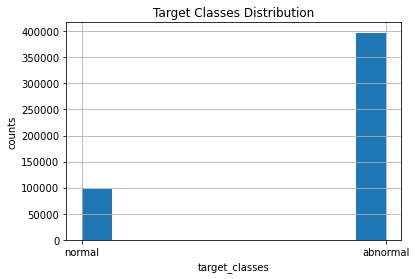

In [8]:
label_hist_plot = df['label'].hist()
label_hist_plot.set_xlabel('target_classes')
label_hist_plot.set_ylabel('counts')
label_hist_plot.set_title('Target Classes Distribution')

***Categorical Variables Distribution***

In [105]:
catg_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

In [106]:
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
is_host_login      int64
is_guest_login     int64
dtype: object

As seen from the above datatypes of the categorical columns,the column values are not strings. We need to convert them to string before performing any analysis

***Fixing the data types of categorical columns***

In [11]:
df['protocol_type'] = df['protocol_type'].astype(str)
df['service'] = df['service'].astype(str)
df['flag'] = df['flag'].astype(str)
df['land'] = df['land'].astype(str)
df['logged_in'] = df['logged_in'].astype(str)
df['is_host_login'] = df['is_host_login'].astype(str)
df['is_guest_login'] = df['is_guest_login'].astype(str)
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land              object
logged_in         object
is_host_login     object
is_guest_login    object
dtype: object

***Distribution Plots for categorical variables***

In [12]:
df[catg_cols].describe()

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login
count,494020,494020,494020,494020,494020,494020,494020
unique,3,66,11,2,2,1,2
top,icmp,ecr_i,SF,0,0,0,0
freq,283602,281400,378439,493998,420784,494020,493335


***protocol_type distribution***

Text(0.5, 1.0, 'protocol_type distribution')

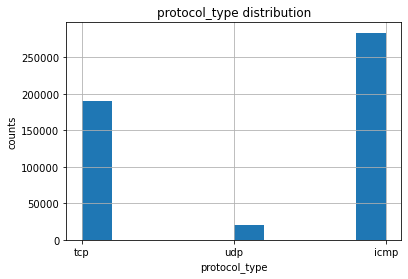

In [13]:
protocol_type_hist_plot = df['protocol_type'].hist()
protocol_type_hist_plot.set_xlabel('protocol_type')
protocol_type_hist_plot.set_ylabel('counts')
protocol_type_hist_plot.set_title('protocol_type distribution')

***service distribution***

In [14]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [15]:
print(list(df['service'].unique())) # possible values for the column service

['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp', 'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data', 'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh', 'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf', 'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer', 'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard', 'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2', 'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i', 'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i']


***flag distribution***

Text(0.5, 1.0, 'flag distribution')

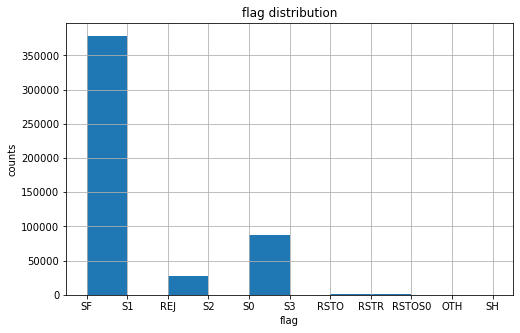

In [16]:
flag_hist_plot = df['flag'].hist(figsize=(8,5))
flag_hist_plot.set_xlabel('flag')
flag_hist_plot.set_ylabel('counts')
flag_hist_plot.set_title('flag distribution')

***land distribution***

Text(0.5, 1.0, 'flag distribution')

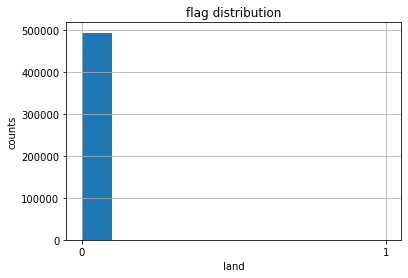

In [17]:
land_hist_plot = df['land'].hist()
land_hist_plot.set_xlabel('land')
land_hist_plot.set_ylabel('counts')
land_hist_plot.set_title('flag distribution')

***logged_in***

Text(0.5, 1.0, 'logged_in distribution')

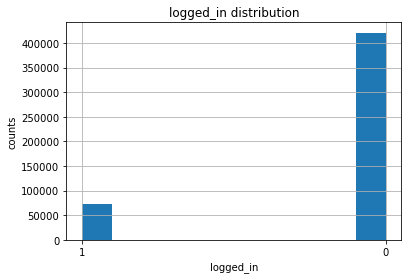

In [18]:
logged_in_hist_plot = df['logged_in'].hist()
logged_in_hist_plot.set_xlabel('logged_in')
logged_in_hist_plot.set_ylabel('counts')
logged_in_hist_plot.set_title('logged_in distribution')

***is_guest_login***

Text(0.5, 1.0, 'is_guest_login distribution')

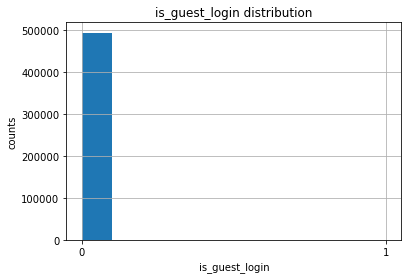

In [19]:
is_guest_login_hist_plot = df['is_guest_login'].hist()
is_guest_login_hist_plot.set_xlabel('is_guest_login')
is_guest_login_hist_plot.set_ylabel('counts')
is_guest_login_hist_plot.set_title('is_guest_login distribution')

***is_host_login***

Text(0.5, 1.0, 'is_host_login distribution')

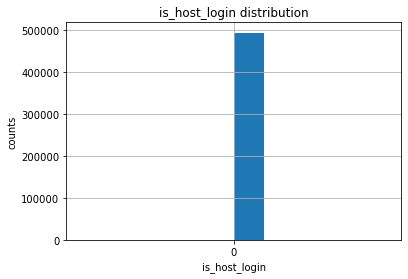

In [20]:
is_host_login_hist_plot = df['is_host_login'].hist()
is_host_login_hist_plot.set_xlabel('is_host_login')
is_host_login_hist_plot.set_ylabel('counts')
is_host_login_hist_plot.set_title('is_host_login distribution')

In [21]:
df['is_host_login'].value_counts() # this value can be dropped as all values are same and may not affect the model

0    494020
Name: is_host_login, dtype: int64

***Continous Variables Distribution***

In [107]:
cont_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']

In [108]:
df[cont_cols].dtypes # verify if all dtypes are either float or int, otherwise fix them

duration                         int64
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count       

In [24]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101230,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
num_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0
root_shell,494020.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0
su_attempted,494020.0,0.000036,0.007793,0.0,0.00,0.0,0.00,2.0


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>,
        <AxesSubplot:title={'center':'hot'}>],
       [<AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>,
        <AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>],
       [<AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'srv_count'}>,
        <AxesSubplot:title={'center':'serror_rate'}>],
       [<AxesSubplot:title

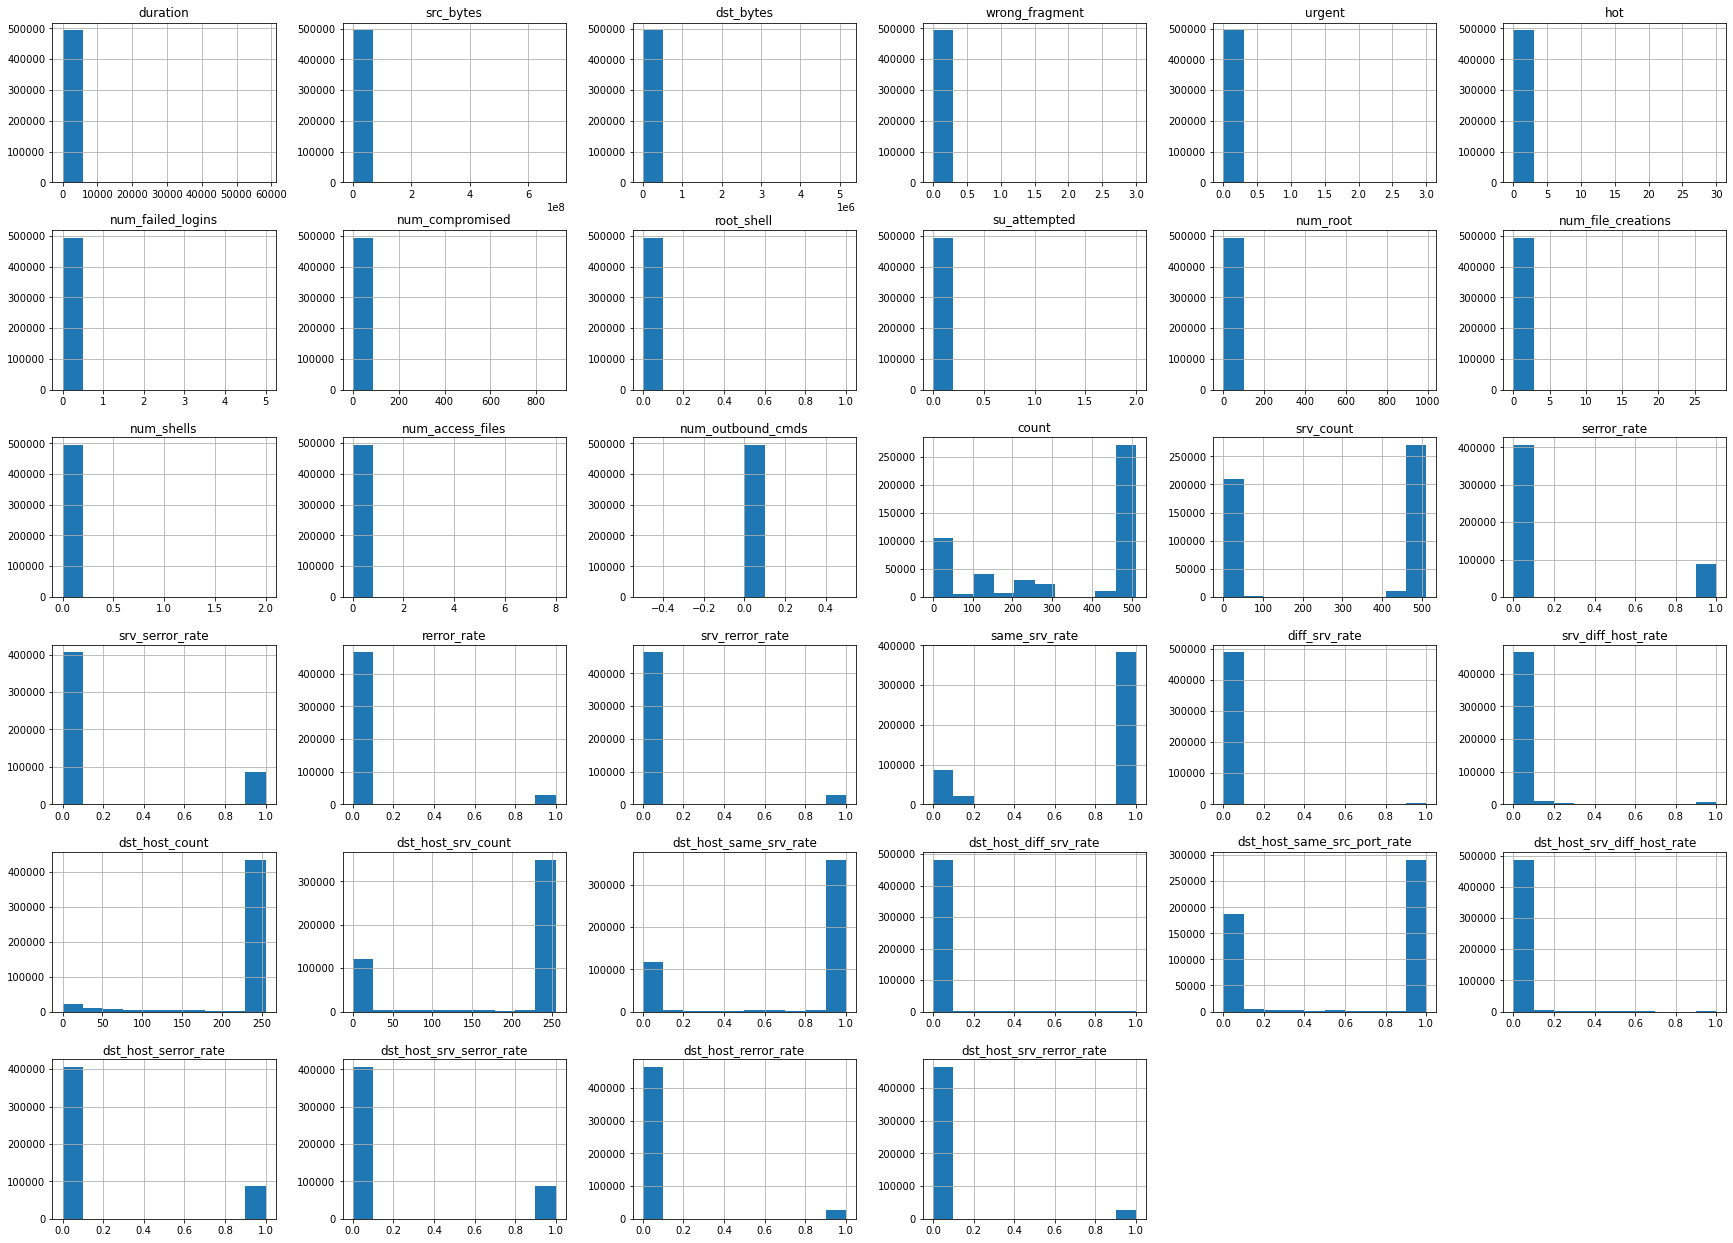

In [25]:
df[cont_cols].hist(figsize=(30,22))

# ***3. Data Normalization***

In [26]:
from sklearn import preprocessing # using sklearn library preprocessing function

In [27]:
df[cont_cols] = preprocessing.normalize(df[cont_cols],axis=0) # axis has to be set to 0 to perform column wise normalization

In [28]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,0.000096,0.001419,0.0,0.000000e+00,0.000000e+00,0.000000,0.116987
src_bytes,494020.0,0.000004,0.001423,0.0,6.478663e-08,7.486455e-07,0.000001,0.998255
dst_bytes,494020.0,0.000037,0.001422,0.0,0.000000e+00,0.000000e+00,0.000000,0.221925
wrong_fragment,494020.0,0.000068,0.001421,0.0,0.000000e+00,0.000000e+00,0.000000,0.031626
urgent,494020.0,0.000004,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.774597
hot,494020.0,0.000063,0.001421,0.0,0.000000e+00,0.000000e+00,0.000000,0.054521
num_failed_logins,494020.0,0.000014,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.458349
num_compromised,494020.0,0.000008,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.699366
root_shell,494020.0,0.000015,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.134840
su_attempted,494020.0,0.000007,0.001423,0.0,0.000000e+00,0.000000e+00,0.000000,0.365148


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>,
        <AxesSubplot:title={'center':'hot'}>],
       [<AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>,
        <AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>],
       [<AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'srv_count'}>,
        <AxesSubplot:title={'center':'serror_rate'}>],
       [<AxesSubplot:title

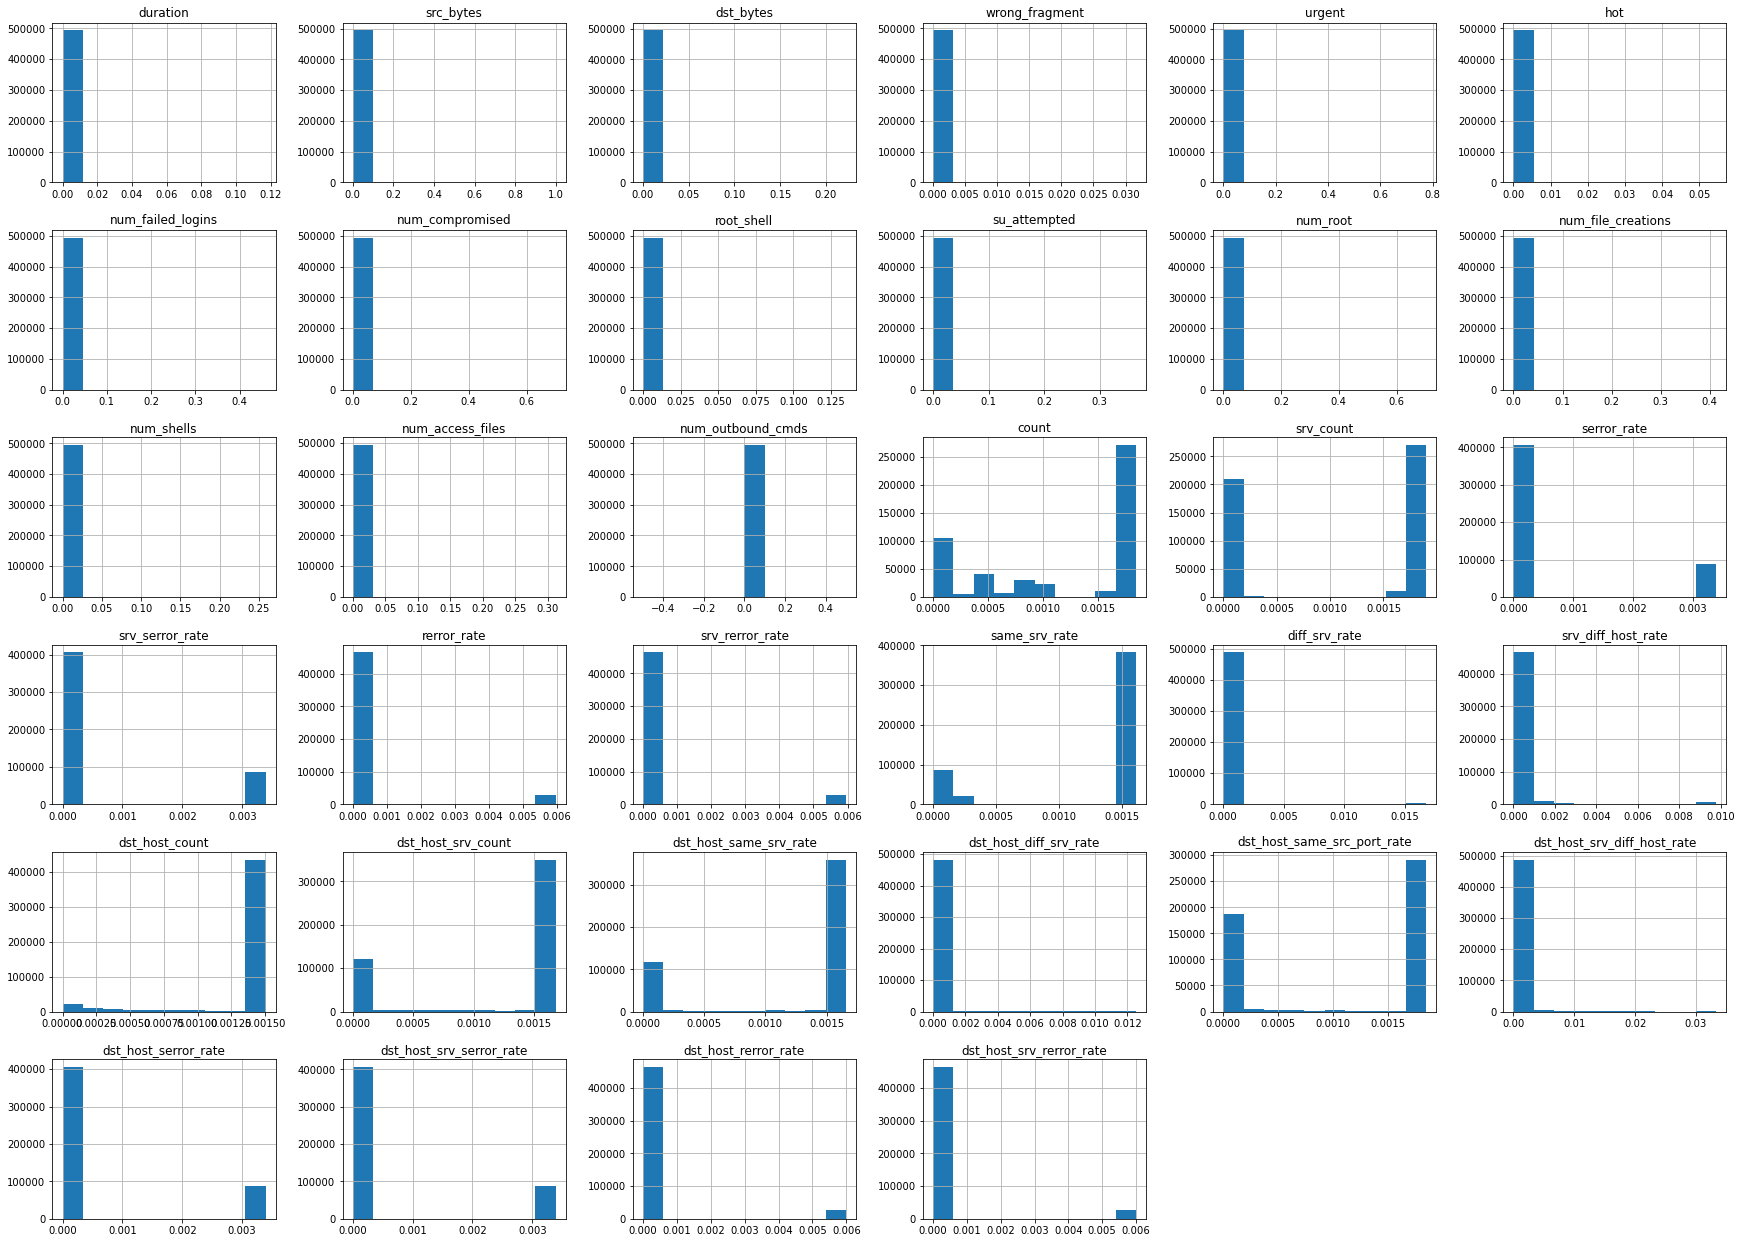

In [29]:
df[cont_cols].hist(figsize=(30,22)) # all values are between 0 and 1 with unit norm

In [30]:
df.sample(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
84240,0.0,tcp,http,SF,3.109758e-07,0.000031,0,0.0,0.0,0.0,...,0.001676,0.001657,0.0,0.000018,0.001668,0.0,0.0,0.0,0.0,normal
92229,0.0,icmp,ecr_i,SF,1.485773e-06,0.000000,0,0.0,0.0,0.0,...,0.001676,0.001657,0.0,0.001846,0.000000,0.0,0.0,0.0,0.0,abnormal


In [11]:
df.drop(columns=['is_host_login'], inplace=True)
df.drop(columns=['num_outbound_cmds'], inplace=True)

***Transform Target Binary label to 0 and 1***

In [12]:
df['label'] = df['label'].map({'normal': 1, 'abnormal': 0})
df['label'].value_counts()

0    396743
1     97277
Name: label, dtype: int64

***One hot encode categorical columns***

In [13]:
def convert_categorical_to_one_hot_encoding(dataset, column_name):
    dummy_values = pd.get_dummies(dataset[column_name])
    
    for category in dummy_values.columns:
        dummy_value_name = f"{column_name}-{category}"
        dataset[dummy_value_name] = dummy_values[category]
    dataset.drop(column_name, axis=1, inplace=True)

In [14]:
for cat_col in catg_cols:
    if cat_col != "is_host_login":
        convert_categorical_to_one_hot_encoding(df, cat_col)
df.shape

(494020, 120)

In [15]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_guest_login-0,is_guest_login-1
0,0,181,5450,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,0,239,486,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
2,0,235,1337,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,219,1337,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,0,217,2032,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


Shuffle DataFrame

In [16]:
df = df.sample(frac=1).reset_index(drop=True)

***Data Normalization (scaling numerical features to unit norm)***

In [20]:
cont_cols_new = [each for each in cont_cols if each!='num_outbound_cmds']

In [21]:
df_CONTCOLS_MIN = df[cont_cols_new].min(axis=0)
df_CONTCOLS_MAX = df[cont_cols_new].max(axis=0)

In [22]:
df[cont_cols_new] = (df[cont_cols_new] - df_CONTCOLS_MIN) / (df_CONTCOLS_MAX - df_CONTCOLS_MIN)

In [23]:
df[cont_cols_new].head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.050980,0.05,0.08,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.078431,0.08,0.05,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.003922,0.00,0.07,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.007843,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.isna().values.any() # making sure there are no NaN values in the dataset

False

In [42]:
X_numpy = df.drop(columns=['label']).to_numpy()
Y_numpy = df['label'].to_numpy()

In [43]:
X_numpy.shape

(494020, 119)

In [44]:
Y_numpy.shape

(494020,)

# ***Model Building (Model that overfits entire dataset)***

***Step-1: With single neuron logistic regression model***

In [45]:
from keras.utils.vis_utils import plot_model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential()
model_1.add(Dense(1, input_dim = len(X_numpy[0, :]), activation='sigmoid'))

In [47]:
model_1.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model_1.fit(X_numpy, Y_numpy, epochs = 256, verbose = 1)

Epoch 1/256
15439/15439 [==============================] - 11s 695us/step - loss: 0.0450 - accuracy: 0.9855
Epoch 2/256
15439/15439 [==============================] - 13s 822us/step - loss: 0.0262 - accuracy: 0.9914
Epoch 3/256
15439/15439 [==============================] - 12s 803us/step - loss: 0.0239 - accuracy: 0.9915
Epoch 4/256
15439/15439 [==============================] - 11s 714us/step - loss: 0.0229 - accuracy: 0.9915
Epoch 5/256
15439/15439 [==============================] - 11s 741us/step - loss: 0.0223 - accuracy: 0.9915
Epoch 6/256
15439/15439 [==============================] - 11s 733us/step - loss: 0.0217 - accuracy: 0.9917
Epoch 7/256
15439/15439 [==============================] - 10s 645us/step - loss: 0.0213 - accuracy: 0.9919
Epoch 8/256
15439/15439 [==============================] - 10s 668us/step - loss: 0.0211 - accuracy: 0.9920
Epoch 9/256
15439/15439 [==============================] - 10s 658us/step - loss: 0.0206 - accuracy: 0.9924
Epoch 10/256
15439/15439 [==

15439/15439 [==============================] - 10s 643us/step - loss: 0.0265 - accuracy: 0.9980
Epoch 151/256
15439/15439 [==============================] - 11s 685us/step - loss: 0.0265 - accuracy: 0.9980
Epoch 152/256
15439/15439 [==============================] - 10s 672us/step - loss: 0.0266 - accuracy: 0.9980
Epoch 153/256
15439/15439 [==============================] - 10s 621us/step - loss: 0.0266 - accuracy: 0.9980
Epoch 154/256
15439/15439 [==============================] - 10s 621us/step - loss: 0.0266 - accuracy: 0.9980
Epoch 155/256
15439/15439 [==============================] - 10s 638us/step - loss: 0.0267 - accuracy: 0.9980
Epoch 156/256
15439/15439 [==============================] - 10s 631us/step - loss: 0.0267 - accuracy: 0.9980
Epoch 157/256
15439/15439 [==============================] - 10s 628us/step - loss: 0.0267 - accuracy: 0.9980
Epoch 158/256
15439/15439 [==============================] - 12s 767us/step - loss: 0.0268 - accuracy: 0.9980
Epoch 159/256
15439/1543

In [48]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


Conlusion-1:
    
As seen from the above model, the basic logistic regression model has achieved an accuracy of 99.81 with 256 epochs.

***Step-2 : Model with more layers and neurons so that dataset can overfit to 100%***

In [50]:
model_2 = Sequential()
model_2.add(Dense(8, input_dim = len(X_numpy[0, :]), activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(2, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [51]:
model_2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_2_history = model_2.fit(X_numpy, Y_numpy, epochs = 32, verbose = 1)

Epoch 1/32
15439/15439 [==============================] - 12s 796us/step - loss: 0.0744 - accuracy: 0.9740
Epoch 2/32
15439/15439 [==============================] - 12s 779us/step - loss: 0.0370 - accuracy: 0.9910
Epoch 3/32
15439/15439 [==============================] - 12s 769us/step - loss: 0.0369 - accuracy: 0.9910
Epoch 4/32
15439/15439 [==============================] - 12s 763us/step - loss: 0.0367 - accuracy: 0.9910
Epoch 5/32
15439/15439 [==============================] - 13s 869us/step - loss: 0.0362 - accuracy: 0.9911
Epoch 6/32
15439/15439 [==============================] - 12s 763us/step - loss: 0.0235 - accuracy: 0.9946
Epoch 7/32
15439/15439 [==============================] - 13s 862us/step - loss: 0.0081 - accuracy: 0.9978
Epoch 8/32
15439/15439 [==============================] - 12s 756us/step - loss: 0.0036 - accuracy: 0.9992
Epoch 9/32
15439/15439 [==============================] - 12s 783us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 10/32
15439/15439 [============

***Model - 2: Epochs vs Loss & Epochs vs Accuracy***

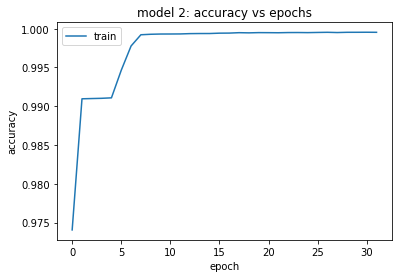

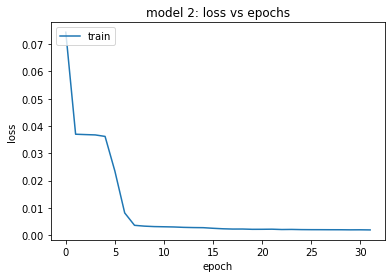

In [52]:
import matplotlib.pyplot as plt

plt.plot(model_2_history.history['accuracy'])
plt.title('model 2: accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_2_history.history['loss'])
plt.title('model 2: loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 960       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


Conclusion-2: A seen from the model-2 performance we have achieved 99.95% accuracy (close to 100%) which means this model did overfit the dataset

# Baseline Model to BestModel

***1.Shuffle DataFrame***

In [25]:
df = df.sample(frac=1).reset_index(drop=True)

In [26]:
X_numpy = df.drop(columns=['label']).to_numpy()
Y_numpy = df['label'].to_numpy()

In [27]:
X_numpy.shape

(494020, 119)

In [28]:
Y_numpy.shape

(494020,)

In [29]:
# Split into training and validation, 20% validation set and 80% training 
index_20percent = int(0.2 * len(df.to_numpy()[:, 0]))
print(index_20percent)
XVALID = X_numpy[:index_20percent]
YVALID = Y_numpy[:index_20percent]
XTRAIN = X_numpy[index_20percent:]
YTRAIN = Y_numpy[index_20percent:]

98804


***Baseline to Best on Validation Set***

In [31]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
all_models = {}

In [33]:
import tensorflow as tf
metrics_to_obtain = ['accuracy', tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    tf.keras.metrics.AUC()]

***Step-1: Finiding the best number of hidden layers (Baseline Performance)***

In [34]:
no_hidden_layers_model = Sequential()
no_hidden_layers_model.add(Dense(1, input_dim = len(XTRAIN[0, :])))
no_hidden_layers_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

single_hidden_layer_model = Sequential()
single_hidden_layer_model.add(Dense(4, input_dim = len(XTRAIN[0, :])))
single_hidden_layer_model.add(Dense(1, activation='sigmoid'))
single_hidden_layer_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

two_hidden_layers_model = Sequential()
two_hidden_layers_model.add(Dense(4, input_dim = len(XTRAIN[0, :])))
two_hidden_layers_model.add(Dense(2, activation='sigmoid'))
two_hidden_layers_model.add(Dense(1, activation='sigmoid'))
two_hidden_layers_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [35]:
all_models['No Hidden Layers'] = no_hidden_layers_model
all_models['Single Hidden Layer'] = single_hidden_layer_model
all_models['Two Hidden Layers'] = two_hidden_layers_model
all_models

{'No Hidden Layers': <tensorflow.python.keras.engine.sequential.Sequential at 0x1c6d0489d90>,
 'Single Hidden Layer': <tensorflow.python.keras.engine.sequential.Sequential at 0x1c6d0498f40>,
 'Two Hidden Layers': <tensorflow.python.keras.engine.sequential.Sequential at 0x1c6d0501f10>}

In [36]:
no_hidden_layers_model_history = no_hidden_layers_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs = 8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.1500 - accuracy: 0.9733 - val_loss: 0.0765 - val_accuracy: 0.9913
Epoch 2/8
1544/1544 [==============================] - 1s 887us/step - loss: 0.0763 - accuracy: 0.9920 - val_loss: 0.0769 - val_accuracy: 0.9924
Epoch 3/8
1544/1544 [==============================] - 1s 928us/step - loss: 0.0765 - accuracy: 0.9929 - val_loss: 0.0777 - val_accuracy: 0.9932
Epoch 4/8
1544/1544 [==============================] - 1s 915us/step - loss: 0.0763 - accuracy: 0.9937 - val_loss: 0.0779 - val_accuracy: 0.9939
Epoch 5/8
1544/1544 [==============================] - 1s 808us/step - loss: 0.0764 - accuracy: 0.9939 - val_loss: 0.0783 - val_accuracy: 0.9940
Epoch 6/8
1544/1544 [==============================] - 1s 757us/step - loss: 0.0764 - accuracy: 0.9939 - val_loss: 0.0781 - val_accuracy: 0.9940
Epoch 7/8
1544/1544 [==============================] - 1s 801us/step - loss: 0.0768 - accuracy: 0.9940 - val_loss: 0.0788 - val_accu

In [37]:
single_hidden_layer_model_history = single_hidden_layer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0213 - val_accuracy: 0.9929
Epoch 3/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0192 - val_accuracy: 0.9936
Epoch 4/8
1544/1544 [==============================] - 2s 985us/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.0176 - val_accuracy: 0.9942
Epoch 5/8
1544/1544 [==============================] - 1s 897us/step - loss: 0.0158 - accuracy: 0.9944 - val_loss: 0.0168 - val_accuracy: 0.9944
Epoch 6/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0148 - accuracy: 0.9946 - val_loss: 0.0164 - val_accuracy: 0.9947
Epoch 7/8
1544/1544 [==============================] - 2s 993us/step - loss: 0.0139 - accuracy: 0.9948 - val_loss: 0.0157 - val_accuracy: 

In [38]:
two_hidden_layers_model_history = two_hidden_layers_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.2969 - accuracy: 0.8578 - val_loss: 0.1475 - val_accuracy: 0.9914
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0881 - accuracy: 0.9924 - val_loss: 0.0514 - val_accuracy: 0.9925
Epoch 3/8
1544/1544 [==============================] - 1s 874us/step - loss: 0.0390 - accuracy: 0.9927 - val_loss: 0.0337 - val_accuracy: 0.9927
Epoch 4/8
1544/1544 [==============================] - 1s 932us/step - loss: 0.0319 - accuracy: 0.9928 - val_loss: 0.0320 - val_accuracy: 0.9926
Epoch 5/8
1544/1544 [==============================] - 1s 911us/step - loss: 0.0313 - accuracy: 0.9928 - val_loss: 0.0318 - val_accuracy: 0.9927
Epoch 6/8
1544/1544 [==============================] - 1s 909us/step - loss: 0.0312 - accuracy: 0.9929 - val_loss: 0.0318 - val_accuracy: 0.9927
Epoch 7/8
1544/1544 [==============================] - 1s 852us/step - loss: 0.0312 - accuracy: 0.9929 - val_loss: 0.0318 - val_accura

***Best Performance***

Single Hidden Layer = Accuracy: 99.55

***Step-1: Inference:*** With the initial hyper-parameter settings, it can be observed that 1-Layer model is performing better than other architectures (no-hidden and 2-hidden layers)

***Plotting Learning Curve for the baseline model***

In [39]:
baseline_model = single_hidden_layer_model
baseline_model_history = single_hidden_layer_model_history

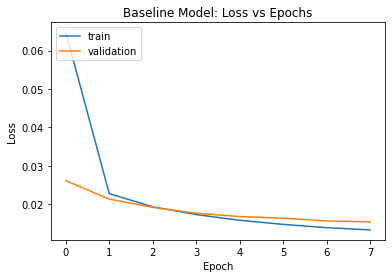

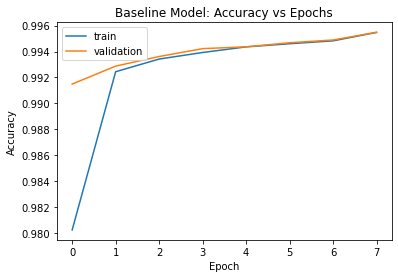

In [40]:
import matplotlib.pyplot as plt

plt.plot(baseline_model_history.history['loss'])
plt.plot(baseline_model_history.history['val_loss'])
plt.title('Baseline Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(baseline_model_history.history['accuracy'])
plt.plot(baseline_model_history.history['val_accuracy'])
plt.title('Baseline Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Learning Curve for no hidden layer model***

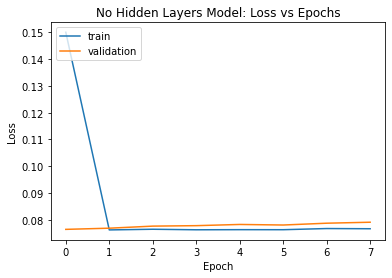

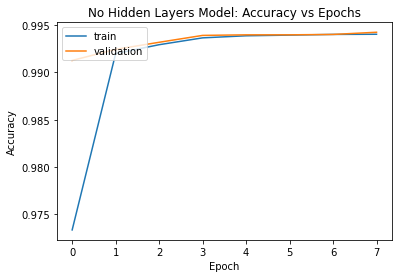

In [42]:
import matplotlib.pyplot as plt

plt.plot(no_hidden_layers_model_history.history['loss'])
plt.plot(no_hidden_layers_model_history.history['val_loss'])
plt.title('No Hidden Layers Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(no_hidden_layers_model_history.history['accuracy'])
plt.plot(no_hidden_layers_model_history.history['val_accuracy'])
plt.title('No Hidden Layers Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Learning Curve for Two Hidden Layers Model***

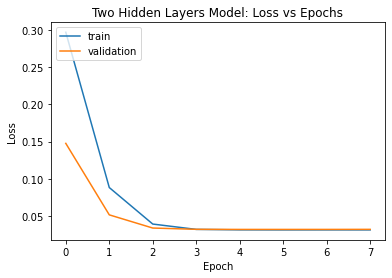

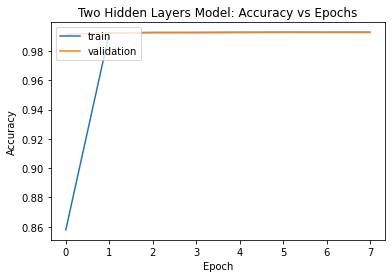

In [43]:
import matplotlib.pyplot as plt

plt.plot(two_hidden_layers_model_history.history['loss'])
plt.plot(two_hidden_layers_model_history.history['val_loss'])
plt.title('Two Hidden Layers Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(two_hidden_layers_model_history.history['accuracy'])
plt.plot(two_hidden_layers_model_history.history['val_accuracy'])
plt.title('Two Hidden Layers Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Step-2: Trying out different hyper-parameter combinations***

***Changing the activation function and losses***

In [45]:
relu_activation_fn_model = Sequential()
relu_activation_fn_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
relu_activation_fn_model.add(Dense(1, activation='sigmoid')) 
relu_activation_fn_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

softmax_activation_fn_model = Sequential()
softmax_activation_fn_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='softmax'))
softmax_activation_fn_model.add(Dense(1, activation='sigmoid'))
softmax_activation_fn_model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [46]:
relu_activation_fn_model_history = relu_activation_fn_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0878 - accuracy: 0.9683 - val_loss: 0.0274 - val_accuracy: 0.9913
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9932 - val_loss: 0.0226 - val_accuracy: 0.9943
Epoch 3/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0209 - accuracy: 0.9943 - val_loss: 0.0202 - val_accuracy: 0.9943
Epoch 4/8
1544/1544 [==============================] - 1s 894us/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0179 - val_accuracy: 0.9944
Epoch 5/8
1544/1544 [==============================] - 1s 936us/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0159 - val_accuracy: 0.9946
Epoch 6/8
1544/1544 [==============================] - 1s 950us/step - loss: 0.0142 - accuracy: 0.9947 - val_loss: 0.0139 - val_accuracy: 0.9949
Epoch 7/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0124 - accuracy: 0.9950 - val_loss: 0.0121 - val_accuracy: 

In [47]:
softmax_activation_fn_model_history = softmax_activation_fn_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 2.3474e-08 - accuracy: 0.1969 - val_loss: 2.3472e-08 - val_accuracy: 0.1969
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 2.3474e-08 - accuracy: 0.1969 - val_loss: 2.3472e-08 - val_accuracy: 0.1969
Epoch 3/8
1544/1544 [==============================] - 2s 1ms/step - loss: 2.3474e-08 - accuracy: 0.1969 - val_loss: 2.3472e-08 - val_accuracy: 0.1969
Epoch 4/8
1544/1544 [==============================] - 2s 987us/step - loss: 2.3474e-08 - accuracy: 0.1969 - val_loss: 2.3472e-08 - val_accuracy: 0.1969
Epoch 5/8
1544/1544 [==============================] - 2s 1ms/step - loss: 2.3474e-08 - accuracy: 0.1969 - val_loss: 2.3472e-08 - val_accuracy: 0.1969
Epoch 6/8
1544/1544 [==============================] - 1s 905us/step - loss: 2.3474e-08 - accuracy: 0.1969 - val_loss: 2.3472e-08 - val_accuracy: 0.1969
Epoch 7/8
1544/1544 [==============================] - 2s 984us/step - loss: 2.3474e-08 - 

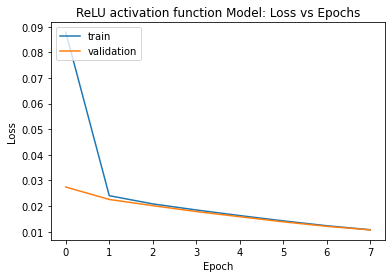

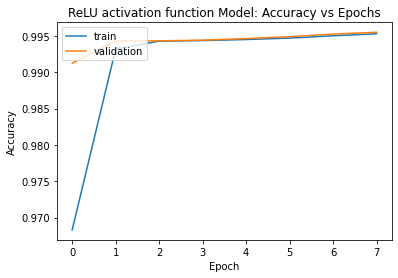

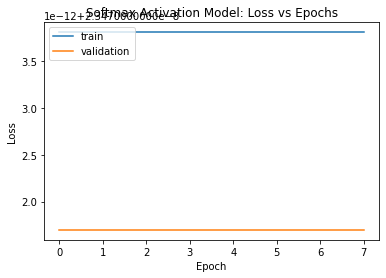

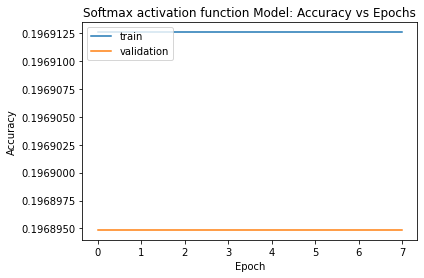

In [48]:
import matplotlib.pyplot as plt

plt.plot(relu_activation_fn_model_history.history['loss'])
plt.plot(relu_activation_fn_model_history.history['val_loss'])
plt.title('ReLU activation function Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(relu_activation_fn_model_history.history['accuracy'])
plt.plot(relu_activation_fn_model_history.history['val_accuracy'])
plt.title('ReLU activation function Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(softmax_activation_fn_model_history.history['loss'])
plt.plot(softmax_activation_fn_model_history.history['val_loss'])
plt.title('Softmax Activation Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(softmax_activation_fn_model_history.history['accuracy'])
plt.plot(softmax_activation_fn_model_history.history['val_accuracy'])
plt.title('Softmax activation function Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
all_models['Single Hidden Layer ReLU Activation'] = relu_activation_fn_model
all_models['Single Hidden Layer Softmax Activation'] = softmax_activation_fn_model

***Inference:*** As seen from the above two model builds, 'relu' activation function has shown better performance where we achieved an accuracy of 99.52. Therefore, Current Best = Baseline + relu activation

***Changing optimizers***

In [50]:
import tensorflow as tf

sgd_optimizer_model = Sequential()
sgd_optimizer_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
sgd_optimizer_model.add(Dense(1, activation='sigmoid'))
sgd_optimizer_model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=[ 'accuracy', tf.keras.metrics.Precision()])

adam_optimizer_model = Sequential()
adam_optimizer_model.add(Dense(4, input_dim = len(XTRAIN[0, :])))
adam_optimizer_model.add(Dense(1, activation='sigmoid'))
adam_optimizer_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=[ 'accuracy'])

adagrad_optimizer_model = Sequential()
adagrad_optimizer_model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
adagrad_optimizer_model.add(Dense(1, activation='sigmoid'))
adagrad_optimizer_model.compile(loss='binary_crossentropy', optimizer = 'Adagrad', metrics=[ 'accuracy'])

In [51]:
all_models['Single Hidden Layer SGD optimizer'] = sgd_optimizer_model
all_models['Single Hidden Layer Adam optimizer'] = adam_optimizer_model
all_models['Single Hidden Layer Adagrad optimizer'] = adagrad_optimizer_model

In [52]:
sgd_optimizer_model_history = sgd_optimizer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.1469 - accuracy: 0.9463 - precision_1: 0.9611 - val_loss: 0.0588 - val_accuracy: 0.9883 - val_precision_1: 0.9566
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0495 - accuracy: 0.9877 - precision_1: 0.9528 - val_loss: 0.0449 - val_accuracy: 0.9872 - val_precision_1: 0.9515
Epoch 3/8
1544/1544 [==============================] - 2s 992us/step - loss: 0.0428 - accuracy: 0.9873 - precision_1: 0.9510 - val_loss: 0.0414 - val_accuracy: 0.9872 - val_precision_1: 0.9516
Epoch 4/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0401 - accuracy: 0.9874 - precision_1: 0.9514 - val_loss: 0.0393 - val_accuracy: 0.9876 - val_precision_1: 0.9530
Epoch 5/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0383 - accuracy: 0.9878 - precision_1: 0.9532 - val_loss: 0.0377 - val_accuracy: 0.9881 - val_precision_1: 0.9555
Epoch 6/8
1544/1544 [======================

In [53]:
adam_optimizer_model_history = adam_optimizer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0323 - val_accuracy: 0.9915
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0242 - val_accuracy: 0.9918
Epoch 3/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.0204 - val_accuracy: 0.9925
Epoch 4/8
1544/1544 [==============================] - 1s 927us/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0186 - val_accuracy: 0.9941
Epoch 5/8
1544/1544 [==============================] - 1s 927us/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0170 - val_accuracy: 0.9940
Epoch 6/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 0.0160 - val_accuracy: 0.9946
Epoch 7/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0142 - accuracy: 0.9948 - val_loss: 0.0157 - val_accuracy: 0.

In [54]:
adagrad_optimizer_model_history = adagrad_optimizer_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.5737 - accuracy: 0.7072 - val_loss: 0.4540 - val_accuracy: 0.8051
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.4045 - accuracy: 0.8463 - val_loss: 0.3637 - val_accuracy: 0.8905
Epoch 3/8
1544/1544 [==============================] - 1s 910us/step - loss: 0.3346 - accuracy: 0.9312 - val_loss: 0.3100 - val_accuracy: 0.9645
Epoch 4/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.2911 - accuracy: 0.9638 - val_loss: 0.2736 - val_accuracy: 0.9649
Epoch 5/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.2591 - accuracy: 0.9639 - val_loss: 0.2453 - val_accuracy: 0.9644
Epoch 6/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.2338 - accuracy: 0.9642 - val_loss: 0.2225 - val_accuracy: 0.9655
Epoch 7/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.2132 - accuracy: 0.9652 - val_loss: 0.2039 - val_accuracy: 0.96

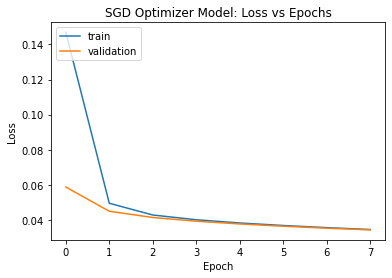

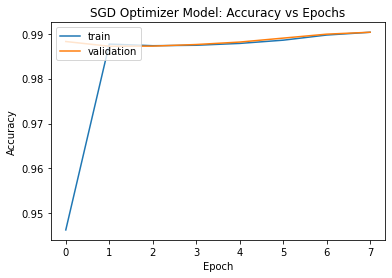

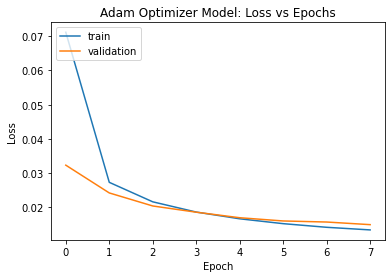

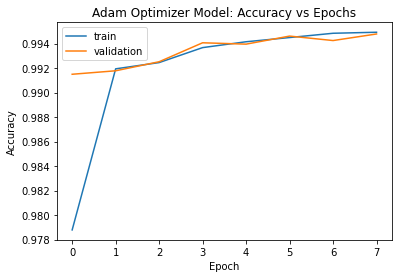

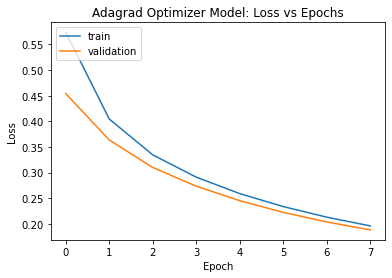

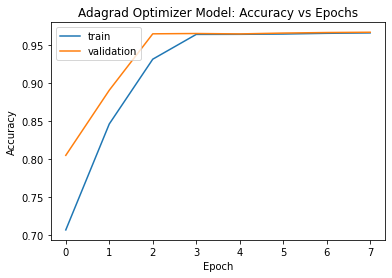

In [55]:
import matplotlib.pyplot as plt

plt.plot(sgd_optimizer_model_history.history['loss'])
plt.plot(sgd_optimizer_model_history.history['val_loss'])
plt.title('SGD Optimizer Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(sgd_optimizer_model_history.history['accuracy'])
plt.plot(sgd_optimizer_model_history.history['val_accuracy'])
plt.title('SGD Optimizer Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adam_optimizer_model_history.history['loss'])
plt.plot(adam_optimizer_model_history.history['val_loss'])
plt.title('Adam Optimizer Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adam_optimizer_model_history.history['accuracy'])
plt.plot(adam_optimizer_model_history.history['val_accuracy'])
plt.title('Adam Optimizer Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adagrad_optimizer_model_history.history['loss'])
plt.plot(adagrad_optimizer_model_history.history['val_loss'])
plt.title('Adagrad Optimizer Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(adagrad_optimizer_model_history.history['accuracy'])
plt.plot(adagrad_optimizer_model_history.history['val_accuracy'])
plt.title('Adagrad Optimizer Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Inference:*** As seen from above three model runs, 'rmsprop' optimizer that was used in the baseline model still performed better when compared to other optimizers

***Changing the batch size***

In [56]:
single_hidden_layer_relu_model_batch_128 = Sequential()
single_hidden_layer_relu_model_batch_128.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_batch_128.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_batch_128.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_batch_64 = Sequential()
single_hidden_layer_relu_model_batch_64.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_batch_64.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_batch_64.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_batch_32 = Sequential()
single_hidden_layer_relu_model_batch_32.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_batch_32.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_batch_32.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [57]:
all_models['Single Hidden Layer Batch Size 128'] = single_hidden_layer_relu_model_batch_128
all_models['Single Hidden Layer Batch Size 64'] = single_hidden_layer_relu_model_batch_64
all_models['Single Hidden Layer Batch Size 32'] = single_hidden_layer_relu_model_batch_32

In [58]:
single_hidden_layer_relu_model_batch_128_history = single_hidden_layer_relu_model_batch_128.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=128, epochs =8, verbose = 1)

Epoch 1/8
3088/3088 [==============================] - 3s 1ms/step - loss: 0.0714 - accuracy: 0.9831 - val_loss: 0.0238 - val_accuracy: 0.9928
Epoch 2/8
3088/3088 [==============================] - 3s 902us/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0193 - val_accuracy: 0.9940
Epoch 3/8
3088/3088 [==============================] - 3s 906us/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 4/8
3088/3088 [==============================] - 3s 951us/step - loss: 0.0152 - accuracy: 0.9946 - val_loss: 0.0145 - val_accuracy: 0.9951
Epoch 5/8
3088/3088 [==============================] - 3s 889us/step - loss: 0.0130 - accuracy: 0.9952 - val_loss: 0.0126 - val_accuracy: 0.9954
Epoch 6/8
3088/3088 [==============================] - 3s 896us/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0107 - val_accuracy: 0.9984
Epoch 7/8
3088/3088 [==============================] - 3s 891us/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0087 - val_accu

In [59]:
single_hidden_layer_relu_model_batch_64_history = single_hidden_layer_relu_model_batch_64.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=64, epochs =8, verbose = 1)

Epoch 1/8
6176/6176 [==============================] - 6s 977us/step - loss: 0.0578 - accuracy: 0.9854 - val_loss: 0.0288 - val_accuracy: 0.9928
Epoch 2/8
6176/6176 [==============================] - 6s 904us/step - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0275 - val_accuracy: 0.9939
Epoch 3/8
6176/6176 [==============================] - 5s 834us/step - loss: 0.0265 - accuracy: 0.9941 - val_loss: 0.0274 - val_accuracy: 0.9939
Epoch 4/8
6176/6176 [==============================] - 5s 824us/step - loss: 0.0265 - accuracy: 0.9941 - val_loss: 0.0274 - val_accuracy: 0.9938
Epoch 5/8
6176/6176 [==============================] - 5s 856us/step - loss: 0.0266 - accuracy: 0.9941 - val_loss: 0.0273 - val_accuracy: 0.9940
Epoch 6/8
6176/6176 [==============================] - 5s 854us/step - loss: 0.0266 - accuracy: 0.9942 - val_loss: 0.0274 - val_accuracy: 0.9939
Epoch 7/8
6176/6176 [==============================] - 5s 877us/step - loss: 0.0267 - accuracy: 0.9942 - val_loss: 0.0274 - val_ac

In [60]:
single_hidden_layer_relu_model_batch_32_history = single_hidden_layer_relu_model_batch_32.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=32, epochs =8, verbose = 1)

Epoch 1/8
12351/12351 [==============================] - 10s 803us/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0217 - val_accuracy: 0.9914
Epoch 2/8
12351/12351 [==============================] - 10s 793us/step - loss: 0.0176 - accuracy: 0.9928 - val_loss: 0.0143 - val_accuracy: 0.9959
Epoch 3/8
12351/12351 [==============================] - 10s 800us/step - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.0102 - val_accuracy: 0.9973
Epoch 4/8
12351/12351 [==============================] - 12s 949us/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.0095 - val_accuracy: 0.9985
Epoch 5/8
12351/12351 [==============================] - 10s 808us/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 0.0093 - val_accuracy: 0.9986
Epoch 6/8
12351/12351 [==============================] - 10s 787us/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0089 - val_accuracy: 0.9986
Epoch 7/8
12351/12351 [==============================] - 10s 802us/step - loss: 0.0082 - accuracy: 0.9984 - val_

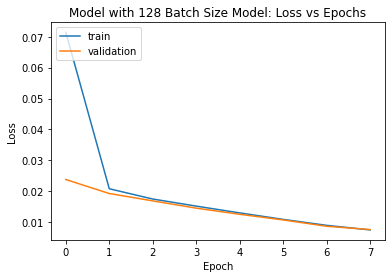

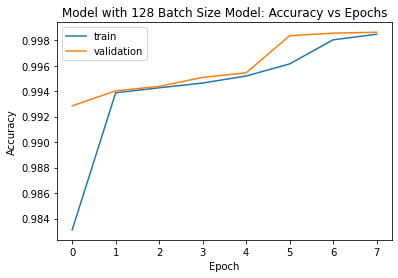

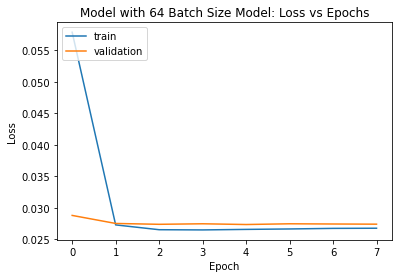

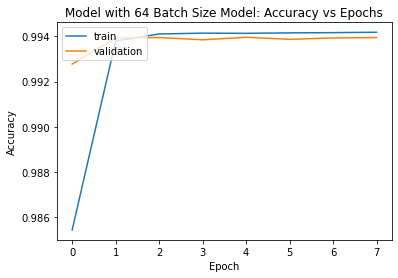

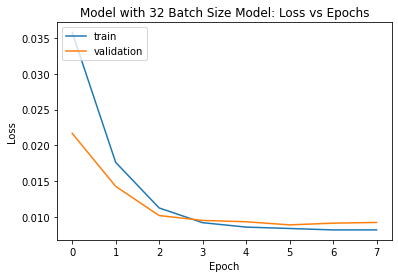

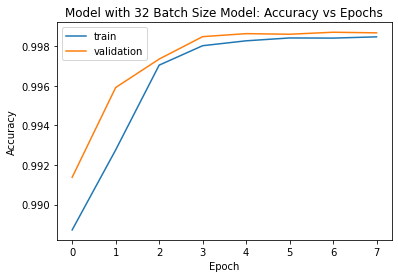

In [61]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_relu_model_batch_128_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_batch_128_history.history['val_loss'])
plt.title('Model with 128 Batch Size Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_128_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_batch_128_history.history['val_accuracy'])
plt.title('Model with 128 Batch Size Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_64_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_batch_64_history.history['val_loss'])
plt.title('Model with 64 Batch Size Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_64_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_batch_64_history.history['val_accuracy'])
plt.title('Model with 64 Batch Size Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



plt.plot(single_hidden_layer_relu_model_batch_32_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_batch_32_history.history['val_loss'])
plt.title('Model with 32 Batch Size Model: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_batch_32_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_batch_32_history.history['val_accuracy'])
plt.title('Model with 32 Batch Size Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Inference:*** As seen from the above model runs for different batch_sizes, the validation set accuracy is highest for batch_size=128 i.e 99.86

***Changing the number of neurons***

In [62]:
single_hidden_layer_2_neurons_relu_model = Sequential()
single_hidden_layer_2_neurons_relu_model.add(Dense(2, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_2_neurons_relu_model.add(Dense(1, activation='sigmoid'))
single_hidden_layer_2_neurons_relu_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_6_neurons_relu_model = Sequential()
single_hidden_layer_6_neurons_relu_model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_6_neurons_relu_model.add(Dense(1, activation='sigmoid'))
single_hidden_layer_6_neurons_relu_model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [63]:
all_models['Single Hidden Layer 2 Neurons'] = single_hidden_layer_2_neurons_relu_model
all_models['Single Hidden Layer 6 Neurons'] = single_hidden_layer_6_neurons_relu_model

In [64]:
single_hidden_layer_2_neurons_relu_model_history = single_hidden_layer_2_neurons_relu_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.1305 - accuracy: 0.9643 - val_loss: 0.0583 - val_accuracy: 0.9914
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0399 - accuracy: 0.9924 - val_loss: 0.0308 - val_accuracy: 0.9935
Epoch 3/8
1544/1544 [==============================] - 1s 968us/step - loss: 0.0280 - accuracy: 0.9940 - val_loss: 0.0280 - val_accuracy: 0.9936
Epoch 4/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9941 - val_loss: 0.0276 - val_accuracy: 0.9939
Epoch 5/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0265 - accuracy: 0.9941 - val_loss: 0.0272 - val_accuracy: 0.9938
Epoch 6/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0262 - accuracy: 0.9942 - val_loss: 0.0269 - val_accuracy: 0.9939
Epoch 7/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0261 - accuracy: 0.9942 - val_loss: 0.0268 - val_accuracy: 0.99

In [65]:
single_hidden_layer_6_neurons_relu_model_history = single_hidden_layer_6_neurons_relu_model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 1)

Epoch 1/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0721 - accuracy: 0.9841 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 2/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0216 - val_accuracy: 0.9931
Epoch 3/8
1544/1544 [==============================] - 2s 980us/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0193 - val_accuracy: 0.9934
Epoch 4/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0175 - accuracy: 0.9937 - val_loss: 0.0177 - val_accuracy: 0.9936
Epoch 5/8
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0156 - accuracy: 0.9941 - val_loss: 0.0157 - val_accuracy: 0.9944
Epoch 6/8
1544/1544 [==============================] - 1s 928us/step - loss: 0.0137 - accuracy: 0.9946 - val_loss: 0.0138 - val_accuracy: 0.9947
Epoch 7/8
1544/1544 [==============================] - 1s 864us/step - loss: 0.0118 - accuracy: 0.9951 - val_loss: 0.0120 - val_accuracy: 

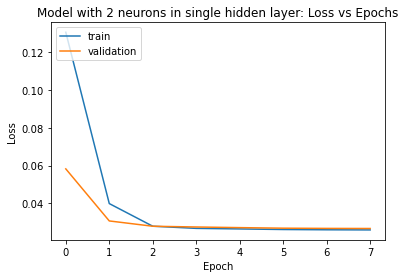

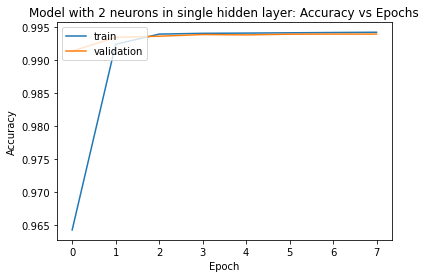

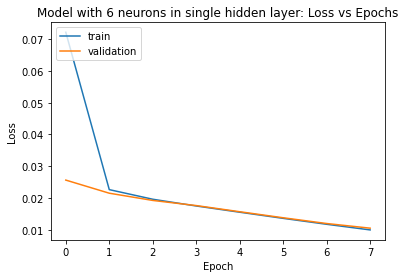

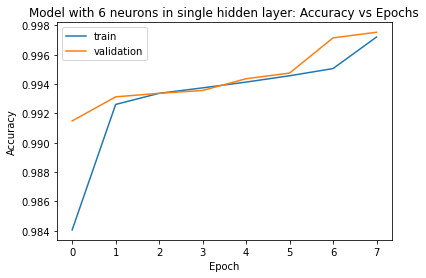

In [66]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['loss'])
plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['val_loss'])
plt.title('Model with 2 neurons in single hidden layer: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['accuracy'])
plt.plot(single_hidden_layer_2_neurons_relu_model_history.history['val_accuracy'])
plt.title('Model with 2 neurons in single hidden layer: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['loss'])
plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['val_loss'])
plt.title('Model with 6 neurons in single hidden layer: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['accuracy'])
plt.plot(single_hidden_layer_6_neurons_relu_model_history.history['val_accuracy'])
plt.title('Model with 6 neurons in single hidden layer: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Inference:*** As seen from the runs of above two models, the number of neurons 4 (which was originally used in baseline model) still performs better (with 99.86 accuracy) than the other 2 neurons and 6 neurons

***Changing number of epochs***

In [67]:
single_hidden_layer_relu_model_epoch_16 = Sequential()
single_hidden_layer_relu_model_epoch_16.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_16.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_16.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_epoch_32 = Sequential()
single_hidden_layer_relu_model_epoch_32.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_32.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_32.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

single_hidden_layer_relu_model_epoch_64_early_stopping = Sequential()
single_hidden_layer_relu_model_epoch_64_early_stopping.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_64_early_stopping.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_64_early_stopping.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])


single_hidden_layer_relu_model_epoch_64_no_early_stopping = Sequential()
single_hidden_layer_relu_model_epoch_64_no_early_stopping.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
single_hidden_layer_relu_model_epoch_64_no_early_stopping.add(Dense(1, activation='sigmoid'))
single_hidden_layer_relu_model_epoch_64_no_early_stopping.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])

In [68]:
all_models['Single Hidden Layer Epoch 16'] = single_hidden_layer_relu_model_epoch_16
all_models['Single Hidden Layer Epoch 32'] = single_hidden_layer_relu_model_epoch_32
all_models['Single Hidden Layer Epoch 64 with Early Stopping'] = single_hidden_layer_relu_model_epoch_64_early_stopping
all_models['Single Hidden Layer Epoch 64 without Early Stopping'] = single_hidden_layer_relu_model_epoch_64_no_early_stopping

In [69]:
single_hidden_layer_relu_model_epoch_16_history = single_hidden_layer_relu_model_epoch_16.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =16, verbose = 1)

Epoch 1/16
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0704 - accuracy: 0.9753 - val_loss: 0.0250 - val_accuracy: 0.9919
Epoch 2/16
1544/1544 [==============================] - 2s 974us/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0198 - val_accuracy: 0.9936
Epoch 3/16
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0165 - val_accuracy: 0.9942
Epoch 4/16
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0149 - accuracy: 0.9945 - val_loss: 0.0142 - val_accuracy: 0.9948
Epoch 5/16
1544/1544 [==============================] - 1s 927us/step - loss: 0.0127 - accuracy: 0.9949 - val_loss: 0.0122 - val_accuracy: 0.9950
Epoch 6/16
1544/1544 [==============================] - 1s 947us/step - loss: 0.0106 - accuracy: 0.9955 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 7/16
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0085 - val_acc

In [70]:
single_hidden_layer_relu_model_epoch_32_history = single_hidden_layer_relu_model_epoch_32.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =32, verbose = 1)

Epoch 1/32
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0653 - accuracy: 0.9825 - val_loss: 0.0263 - val_accuracy: 0.9919
Epoch 2/32
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.0222 - val_accuracy: 0.9941
Epoch 3/32
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0205 - accuracy: 0.9943 - val_loss: 0.0197 - val_accuracy: 0.9943
Epoch 4/32
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0176 - val_accuracy: 0.9944
Epoch 5/32
1544/1544 [==============================] - 1s 916us/step - loss: 0.0160 - accuracy: 0.9944 - val_loss: 0.0154 - val_accuracy: 0.9946
Epoch 6/32
1544/1544 [==============================] - 2s 988us/step - loss: 0.0139 - accuracy: 0.9947 - val_loss: 0.0134 - val_accuracy: 0.9948
Epoch 7/32
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0120 - accuracy: 0.9951 - val_loss: 0.0118 - val_accur

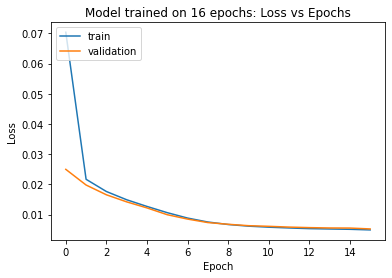

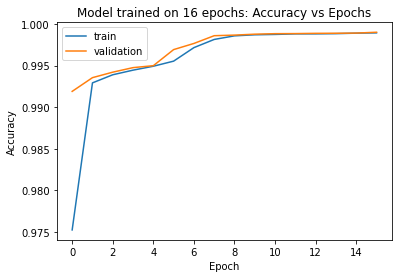

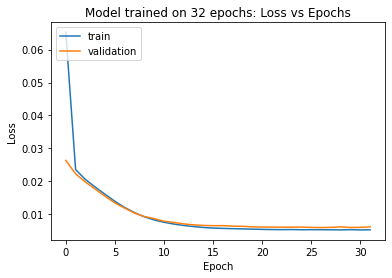

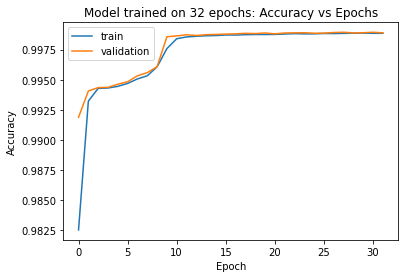

In [71]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['val_loss'])
plt.title('Model trained on 16 epochs: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_16_history.history['val_accuracy'])
plt.title('Model trained on 16 epochs: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['val_loss'])
plt.title('Model trained on 32 epochs: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_32_history.history['val_accuracy'])
plt.title('Model trained on 32 epochs: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Early Stopping***

In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = "../saved_models/early_stopped_model.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)

In [73]:
single_hidden_layer_relu_model_epoch_64_history = single_hidden_layer_relu_model_epoch_64_early_stopping.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =64, verbose = 1,
                                            callbacks = [callback_a, callback_b])

Epoch 1/64
1523/1544 [============================>.] - ETA: 0s - loss: 0.0751 - accuracy: 0.9700
Epoch 00001: val_loss improved from inf to 0.02609, saving model to ../saved_models\early_stopped_model.hdf5
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0743 - accuracy: 0.9703 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 2/64
1488/1544 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9932
Epoch 00002: val_loss improved from 0.02609 to 0.02182, saving model to ../saved_models\early_stopped_model.hdf5
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0218 - val_accuracy: 0.9944
Epoch 3/64
1510/1544 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9943 ETA: 0s - loss: 0.0200 - accu
Epoch 00003: val_loss improved from 0.02182 to 0.01915, saving model to ../saved_models\early_stopped_model.hdf5
1544/1544 [==============================] - 1s 971us/step - loss: 0.0200 -

Epoch 26/64
1538/1544 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9988
Epoch 00026: val_loss did not improve from 0.00572
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0058 - val_accuracy: 0.9989
Epoch 27/64
1542/1544 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9988
Epoch 00027: val_loss did not improve from 0.00572
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 00027: early stopping


In [74]:
single_hidden_layer_relu_model_epoch_64_history_without_early_stopping = single_hidden_layer_relu_model_epoch_64_no_early_stopping.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =64, verbose = 1)

Epoch 1/64
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9723 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 2/64
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9928 - val_loss: 0.0252 - val_accuracy: 0.9931
Epoch 3/64
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0231 - val_accuracy: 0.9931
Epoch 4/64
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0209 - val_accuracy: 0.9931
Epoch 5/64
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0193 - accuracy: 0.9930 - val_loss: 0.0185 - val_accuracy: 0.9931
Epoch 6/64
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.9936 - val_loss: 0.0162 - val_accuracy: 0.9944
Epoch 7/64
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0145 - accuracy: 0.9944 - val_loss: 0.0144 - val_accuracy:

1544/1544 [==============================] - 3s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0063 - val_accuracy: 0.9989
Epoch 58/64
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 59/64
1544/1544 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0063 - val_accuracy: 0.9989
Epoch 60/64
1544/1544 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0063 - val_accuracy: 0.9989
Epoch 61/64
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0064 - val_accuracy: 0.9989
Epoch 62/64
1544/1544 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0064 - val_accuracy: 0.9989
Epoch 63/64
1544/1544 [==============================] - 2s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0064 - val_accuracy: 0.99

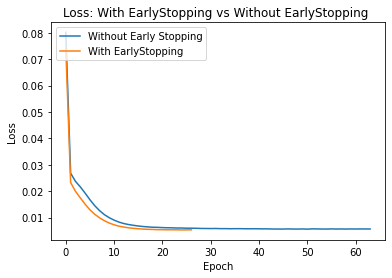

In [75]:
import matplotlib.pyplot as plt


plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['loss'])

plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['loss'])

plt.title('Loss: With EarlyStopping vs Without EarlyStopping ')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Without Early Stopping', 'With EarlyStopping'], loc='upper left')
plt.show()

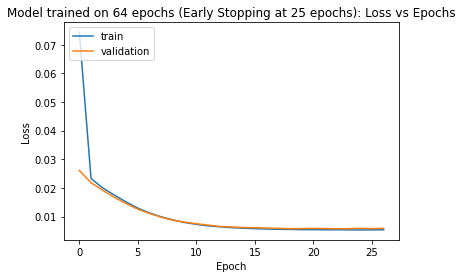

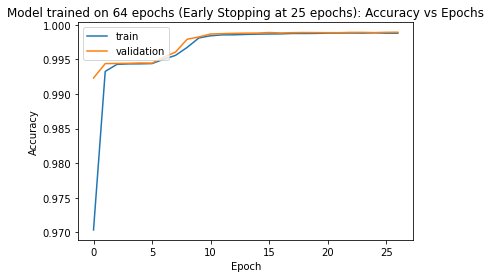

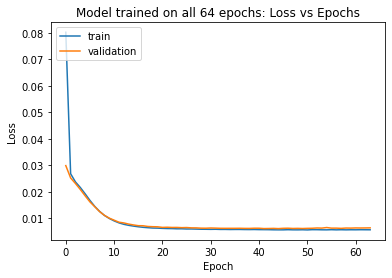

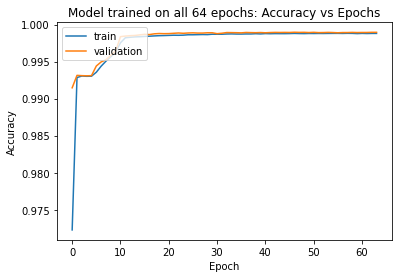

In [76]:
import matplotlib.pyplot as plt

plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['val_loss'])
plt.title('Model trained on 64 epochs (Early Stopping at 25 epochs): Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history.history['val_accuracy'])
plt.title('Model trained on 64 epochs (Early Stopping at 25 epochs): Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['loss'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['val_loss'])
plt.title('Model trained on all 64 epochs: Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['accuracy'])
plt.plot(single_hidden_layer_relu_model_epoch_64_history_without_early_stopping.history['val_accuracy'])
plt.title('Model trained on all 64 epochs: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Inference:*** Early Stopping at Epoch 25 achieved highest accuracy of 99.89

***Final Inference:***

Final Best Model Hyperparameters:
    - batch_size = 256
    - No of hidden layers 1 with 4 neurons
    - Optimizer = rmsprop
    - Loss - Binary Cross Entropy
    - Activation: ReLU
    - Number of epochs = 25

***Model Evaluation***

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [78]:
def plot_roc_curve(fpr_arr, tpr_arr, auc_val, modelname):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_arr, tpr_arr, label=f'{modelname} (area = {round(auc_val,4)})')

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()

Obtaining results and metrics for the model = No Hidden Layers


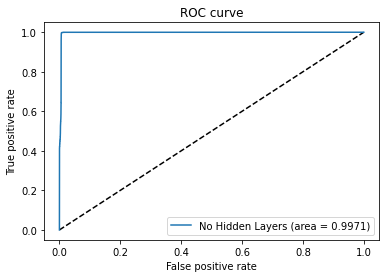



Obtaining results and metrics for the model = Single Hidden Layer


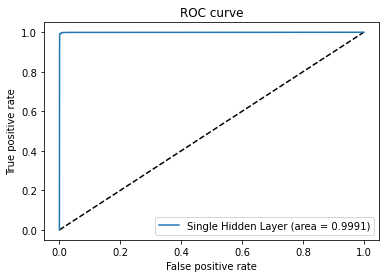



Obtaining results and metrics for the model = Two Hidden Layers


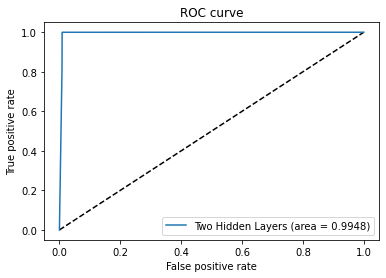



Obtaining results and metrics for the model = Single Hidden Layer ReLU Activation


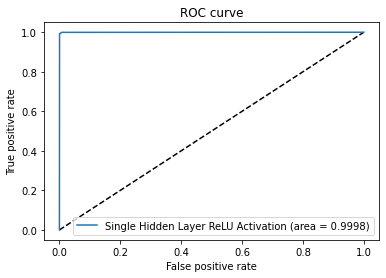



Obtaining results and metrics for the model = Single Hidden Layer Softmax Activation


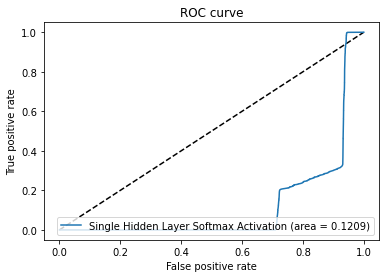



Obtaining results and metrics for the model = Single Hidden Layer SGD optimizer


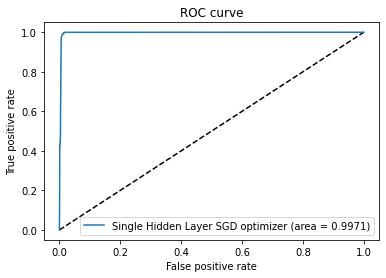



Obtaining results and metrics for the model = Single Hidden Layer Adam optimizer


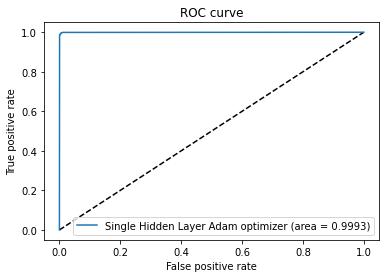



Obtaining results and metrics for the model = Single Hidden Layer Adagrad optimizer


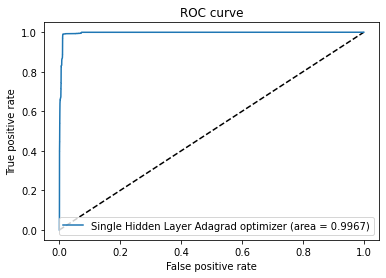



Obtaining results and metrics for the model = Single Hidden Layer Batch Size 128


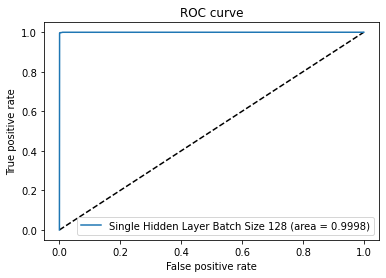



Obtaining results and metrics for the model = Single Hidden Layer Batch Size 64


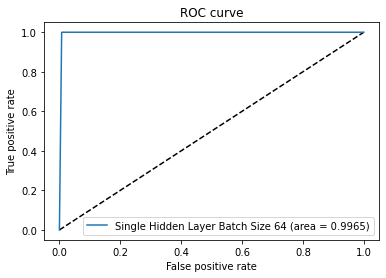



Obtaining results and metrics for the model = Single Hidden Layer Batch Size 32


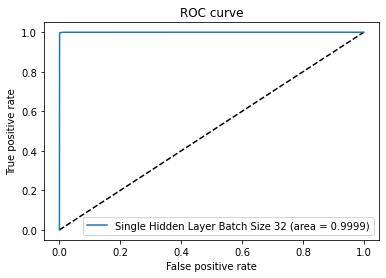



Obtaining results and metrics for the model = Single Hidden Layer 2 Neurons


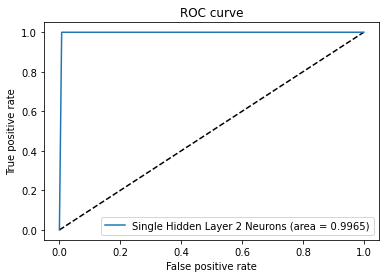



Obtaining results and metrics for the model = Single Hidden Layer 6 Neurons


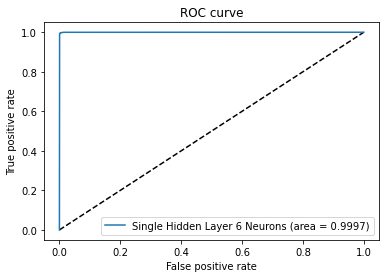



Obtaining results and metrics for the model = Single Hidden Layer Epoch 16


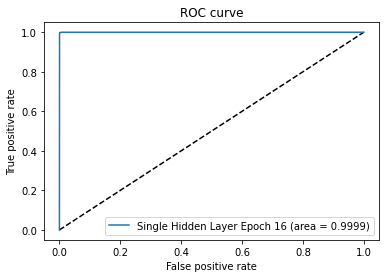



Obtaining results and metrics for the model = Single Hidden Layer Epoch 32


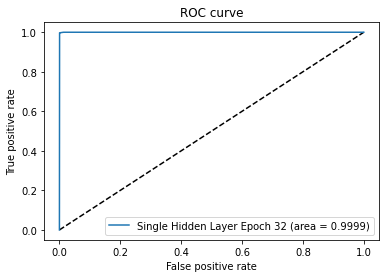



Obtaining results and metrics for the model = Single Hidden Layer Epoch 64 with Early Stopping


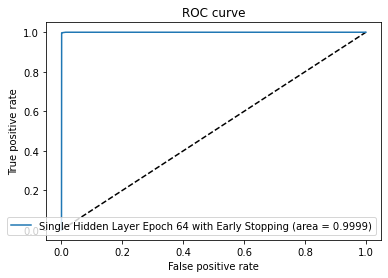



Obtaining results and metrics for the model = Single Hidden Layer Epoch 64 without Early Stopping


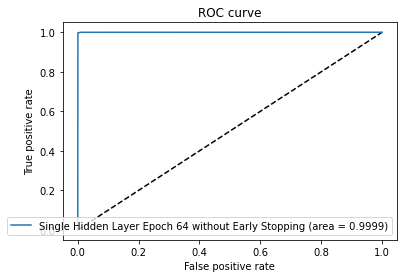

In [79]:
import numpy as np
y_true = YVALID.tolist()

results_df = pd.DataFrame()
idx = 0
for model_name, built_model in all_models.items():
    print(f"Obtaining results and metrics for the model = {model_name}")
    results_df.loc[idx, 'Model'] = model_name
    
    y_pred = built_model.predict(XVALID).tolist()
    y_pred_bool = [1 if each[0] >=0.5 else 0 for each in y_pred]
    #print(min(y_pred), max(y_pred))
    acc, prec, rec, f1 = accuracy_score(y_pred_bool, y_true), precision_score(y_pred_bool, y_true), recall_score(y_pred_bool, y_true), f1_score(y_pred_bool, y_true)
    
    results_df.loc[idx, 'Number of Parameters'] = built_model.count_params()
    results_df.loc[idx, 'Accuracy'] = round(acc,4)
    results_df.loc[idx, 'Precision'] = round(prec,4)
    results_df.loc[idx, 'Recall'] = round(rec,4)
    results_df.loc[idx, 'F1-Score'] = round(f1, 4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_model = auc(fpr, tpr)
    results_df.loc[idx, 'auc_score'] = round(auc_model, 4)
    
    plot_roc_curve(fpr, tpr, auc_model, model_name)
    
    #break
    print("\n")
    idx +=1
    #print(each_model.evaluate(XVALID, YVALID))

In [80]:
results_df

,Model,Number of Parameters,Accuracy,Precision,Recall,F1-Score,auc_score
0,No Hidden Layers,120.0,0.9943,0.9969,0.9745,0.9856,0.9971
1,Single Hidden Layer,485.0,0.9955,0.9928,0.9845,0.9886,0.9991
2,Two Hidden Layers,493.0,0.9927,0.9991,0.9652,0.9818,0.9948
3,Single Hidden Layer ReLU Activation,485.0,0.9955,0.9956,0.9819,0.9887,0.9998
4,Single Hidden Layer Softmax Activation,485.0,0.1969,1.0000,0.1969,0.3290,0.1209
5,Single Hidden Layer SGD optimizer,485.0,0.9903,0.9905,0.9615,0.9758,0.9971
6,Single Hidden Layer Adam optimizer,485.0,0.9948,0.9932,0.9806,0.9868,0.9993
7,Single Hidden Layer Adagrad optimizer,485.0,0.9666,0.8630,0.9635,0.9105,0.9967
8,Single Hidden Layer Batch Size 128,485.0,0.9986,0.9958,0.9972,0.9965,0.9998
9,Single Hidden Layer Batch Size 64,485.0,0.9939,0.9986,0.9715,0.9848,0.9965


In [82]:
results_df.to_csv("results_df.csv", index=False)

***Manual Self Made Custom predict function and its comparision to Keras predict***

In [83]:
def build_best_model():
    best_model_selected = Sequential()
    best_model_selected.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
    best_model_selected.add(Dense(1, activation='sigmoid'))
    best_model_selected.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])
    best_model_selected_history = best_model_selected.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =25, verbose = 1)
    return best_model_selected, best_model_selected_history

In [84]:
best_model_selected, best_model_selected_history = build_best_model()

Epoch 1/25
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 2/25
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0229 - val_accuracy: 0.9926
Epoch 3/25
1544/1544 [==============================] - 2s 2ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0208 - val_accuracy: 0.9929
Epoch 4/25
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0196 - val_accuracy: 0.9933
Epoch 5/25
1544/1544 [==============================] - 3s 2ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.0185 - val_accuracy: 0.9935
Epoch 6/25
1544/1544 [==============================] - 2s 2ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.0173 - val_accuracy: 0.9938
Epoch 7/25
1544/1544 [==============================] - 2s 2ms/step - loss: 0.0156 - accuracy: 0.9942 - val_loss: 0.0159 - val_accuracy:

In [85]:
best_model_selected.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 4)                 480       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [86]:
len(best_model_selected.get_weights())

4

***Manual Compute prediction***

In [88]:
def manual_custom_predict(best_model_selected, XVALID):

    # Parameters layer 1
    W1 = best_model_selected.get_weights()[0]
    b1 = best_model_selected.get_weights()[1]

    # Parameters layer 2
    W2 = best_model_selected.get_weights()[2]
    b2 = best_model_selected.get_weights()[3]

    # Input
    #X1 = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
    # Use the following X1 for single input instead of all at once
    #X1 = np.array([[0,0]])

    # First layer calculation
    L1 = np.dot(XVALID,W1)+b1
    # Relu activation function
    X2 = np.maximum(L1,0)
    # Second layer calculation
    L2 = np.dot(X2,W2)+b2
    # Sigmoid
    output = 1/(1+np.exp(-L2))
    return output

output = manual_custom_predict(best_model_selected, XVALID)

***Compare predictions***

In [89]:
output[:20]

array([[3.67637379e-08],
       [9.99996684e-01],
       [9.99999411e-01],
       [9.99999994e-01],
       [3.46527302e-08],
       [3.46527302e-08],
       [3.46527302e-08],
       [3.46527302e-08],
       [3.46527302e-08],
       [6.45906212e-11],
       [9.99999730e-01],
       [9.99458960e-01],
       [3.46527302e-08],
       [3.46527302e-08],
       [3.46527302e-08],
       [1.80048155e-12],
       [3.46527302e-08],
       [3.46527302e-08],
       [9.99998399e-01],
       [3.56926308e-08]])

In [90]:
keras_model_predictions = best_model_selected.predict(XVALID)
keras_model_predictions[:20]

array([[3.6763755e-08],
       [9.9999678e-01],
       [9.9999952e-01],
       [1.0000000e+00],
       [3.4652746e-08],
       [3.4652746e-08],
       [3.4652746e-08],
       [3.4652746e-08],
       [3.4652746e-08],
       [6.4590638e-11],
       [9.9999970e-01],
       [9.9945903e-01],
       [3.4652746e-08],
       [3.4652746e-08],
       [3.4652746e-08],
       [1.8004783e-12],
       [3.4652746e-08],
       [3.4652746e-08],
       [9.9999839e-01],
       [3.5692580e-08]], dtype=float32)

***Compare metrics***

In [91]:
y_pred_output = [1 if each[0] >=0.5 else 0 for each in output]
acc = accuracy_score(y_pred_output, y_true)
prec = precision_score(y_pred_output, y_true)
rec = recall_score(y_pred_output, y_true)
f1 = f1_score(y_pred_output, y_true)

acc, prec, rec, f1

(0.9988866847496053,
 0.9970700113087283,
 0.9972750642673522,
 0.9971725272465557)

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred_output, y_true)

array([[79297,    57],
       [   53, 19397]], dtype=int64)

In [93]:
y_pred_model = [1 if each[0] >=0.5 else 0 for each in keras_model_predictions]
acc = accuracy_score(y_pred_model, y_true)
prec = precision_score(y_pred_model, y_true)
rec = recall_score(y_pred_model, y_true)
f1 = f1_score(y_pred_model, y_true)

acc, prec, rec, f1

(0.9988866847496053,
 0.9970700113087283,
 0.9972750642673522,
 0.9971725272465557)

In [94]:
confusion_matrix(y_pred_model, y_true)

array([[79297,    57],
       [   53, 19397]], dtype=int64)

***Conclusion:*** As seen from above two metrics, the predictions made from manually implemented custom

***Note:*** The above hyperparameter search can also be performed using grid-search techniques that are available in machine learning librararies like sklearn and tensorflow

# Iterative Feature Reduction and Selection***

***Approach***

Step - 1: Get model stats with single feature 
Step - 2: Get model stats with Important features
Step - 3: Compare model with all features vs model with important features

***Step - 1 Iterative Feature Reduction***

***Note:*** Automated model building with different feature inputs by wrapping the steps in to a function (can be extended as a framework)

In [113]:
# both these columns have all values as 0, hence not useful for our experiments
df.drop(columns=['is_host_login'], inplace=True)
df.drop(columns=['num_outbound_cmds'], inplace=True)
catg_cols.remove('is_host_login')
cont_cols.remove('num_outbound_cmds')

In [114]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

In [115]:
# Transform Target Binary label to 0 and 1
df['label'] = df['label'].map({'normal': 1, 'abnormal': 0})
df['label'].value_counts()

0    396743
1     97277
Name: label, dtype: int64

In [116]:
for cat_col in catg_cols:
    df[cat_col] = df[cat_col].astype(str)

***Step - 1 Iterative Feature Reduction***

***Note:*** Automated model building with different feature inputs by wrapping the steps in to a function (can be extended as a framework)

In [117]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def _convert_categorical_to_one_hot_encoding(dataset, column_name):
    dummy_values = pd.get_dummies(dataset[column_name])
    #print("dummy_values", dummy_values.shape[1])
    for category in dummy_values.columns:
        dummy_value_name = f"{column_name}-{category}"
        dataset[dummy_value_name] = dummy_values[category]
    dataset.drop(column_name, axis=1, inplace=True)
    return dataset

def build_best_model_from_previous_phase(XTRAIN, YTRAIN,XVALID,YVALID):
    best_model_selected = Sequential()
    best_model_selected.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation='relu'))
    best_model_selected.add(Dense(1, activation='sigmoid'))
    best_model_selected.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=[ 'accuracy'])
    best_model_selected_history = best_model_selected.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), 
                                            batch_size=256, epochs =8, verbose = 0)
    return best_model_selected, best_model_selected_history
    
def get_model_accuracy_with_single_input(input_df, input_feature: str):
    
    if input_df.shape[1] != 2:
        raise Exception("Expected single feature input dataset")
    
    if input_feature in catg_cols:
        print(f"Single input feature is categorical and is : {input_feature}")
        input_df = _convert_categorical_to_one_hot_encoding(input_df, input_feature)
    else:
        print(f"Single input feature is continous and is {input_feature}")
        df_CONTCOLS_MIN = input_df[[input_feature]].min(axis=0)
        df_CONTCOLS_MAX = input_df[[input_feature]].max(axis=0)
        input_df[[input_feature]] = (input_df[[input_feature]] - df_CONTCOLS_MIN) / (df_CONTCOLS_MAX - df_CONTCOLS_MIN)
    
    if input_df.isna().values.any() is False:
        raise Exception("Cannot proceed with modeling with null values")
    
    print(input_df.shape)
    input_df = input_df.sample(frac=1).reset_index(drop=True)
    X_numpy = input_df.drop(columns=['label']).to_numpy()
    Y_numpy = input_df['label'].to_numpy()
    print(X_numpy.shape, Y_numpy.shape)
    
    # Split into training and validation, 20% validation set and 80% training 
    index_20percent = int(0.2 * len(input_df.to_numpy()[:, 0]))
    print(index_20percent)
    XVALID = X_numpy[:index_20percent]
    YVALID = Y_numpy[:index_20percent]
    XTRAIN = X_numpy[index_20percent:]
    YTRAIN = Y_numpy[index_20percent:]
    best_model_selected, best_model_selected_history = build_best_model_from_previous_phase(XTRAIN, YTRAIN,XVALID,YVALID)
    return best_model_selected, best_model_selected_history

In [118]:
single_column_accuracy_stats = {}
all_cols = catg_cols + cont_cols
for single_feature in all_cols:
    
    model_object, model_selected_history = get_model_accuracy_with_single_input(df[[single_feature, 'label']], single_feature)
    single_column_accuracy_stats[single_feature] = model_selected_history.history['val_accuracy'][-1]

Single input feature is categorical and is : protocol_type
(494020, 4)
(494020, 3) (494020,)
98804


C:\Users\Saiga\AppData\Local\Temp/ipykernel_12548/1314545211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dummy_value_name] = dummy_values[category]
C:\Users\Saiga\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Single input feature is categorical and is : service
(494020, 67)
(494020, 66) (494020,)
98804
Single input feature is categorical and is : flag
(494020, 12)
(494020, 11) (494020,)
98804
Single input feature is categorical and is : land
(494020, 3)
(494020, 2) (494020,)
98804
Single input feature is categorical and is : logged_in
(494020, 3)
(494020, 2) (494020,)
98804
Single input feature is categorical and is : is_guest_login
(494020, 3)
(494020, 2) (494020,)
98804
Single input feature is continous and is duration
(494020, 2)
(494020, 1) (494020,)
98804


C:\Users\Saiga\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Single input feature is continous and is src_bytes
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is dst_bytes
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is wrong_fragment
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is urgent
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is hot
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is num_failed_logins
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is num_compromised
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is root_shell
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is su_attempted
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is num_root
(494020, 2)
(494020, 1) (494020,)
98804
Single input feature is continous and is num_file_creations
(494020, 2)
(4940

***Note: Removed verbose to avoid spamming with logs in this notebook which makes this notebook super lengthy***

Text(0.5, 1.0, 'Validation Accuracy of Single Input Features')

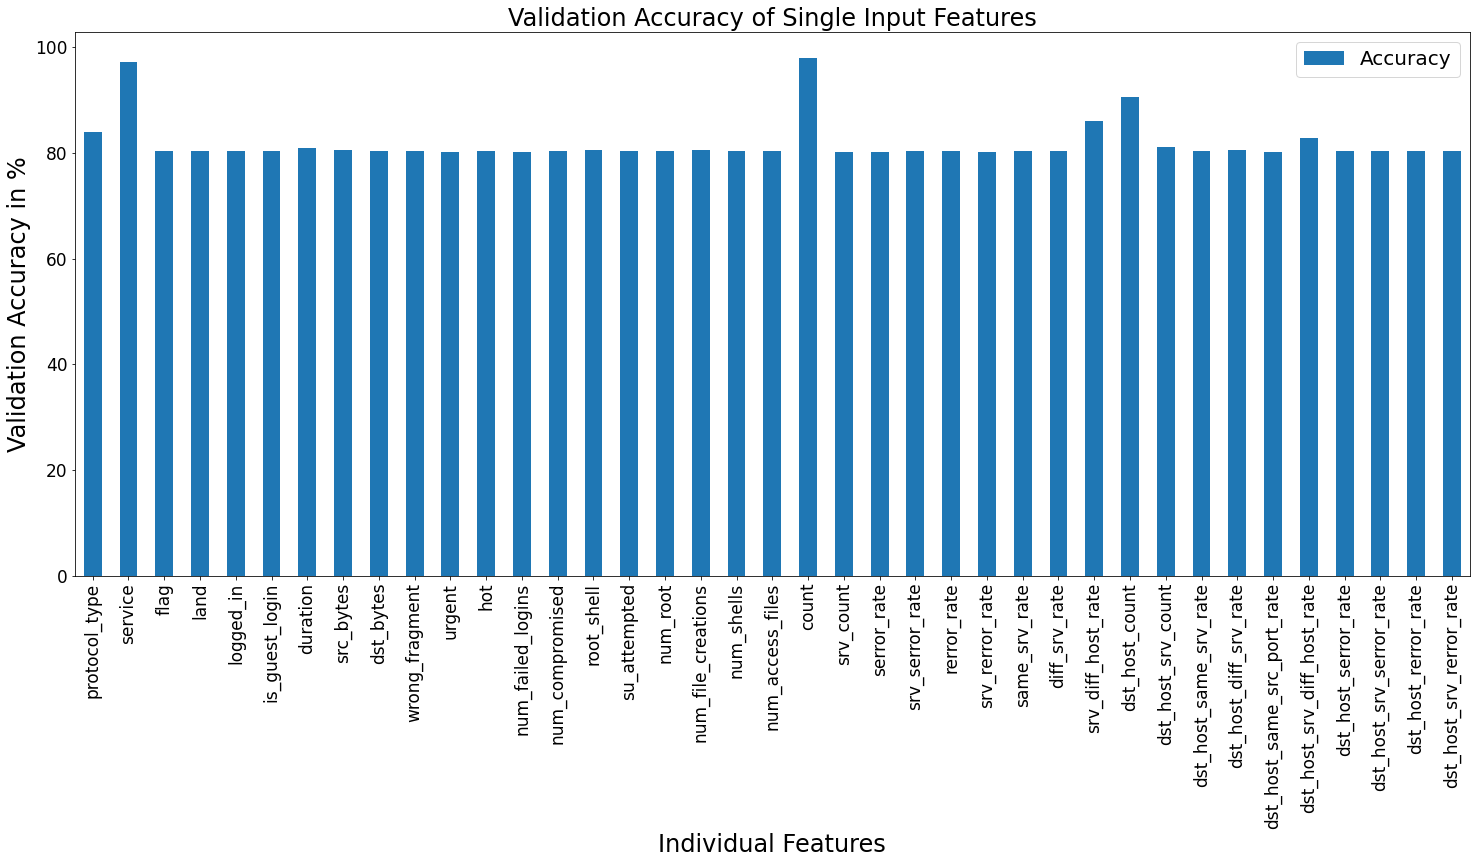

In [119]:
import pandas as pd


single_column_accuracy_stats_df = pd.DataFrame.from_dict(single_column_accuracy_stats, orient='index', columns=['Accuracy'])
single_column_accuracy_stats_df['Accuracy'] = single_column_accuracy_stats_df.apply(lambda row: row['Accuracy'] * 100, axis=1)
ax1 = single_column_accuracy_stats_df.plot.bar(figsize=(25,10), ylabel='Accuracy', rot=90, fontsize=17)
ax1.set_xlabel('Individual Features',fontdict={'fontsize':24})
ax1.set_ylabel('Validation Accuracy in %',fontdict={'fontsize':24})
ax1.legend(fontsize=20)
ax1.set_title("Validation Accuracy of Single Input Features", fontsize=24)

In [120]:
single_column_accuracy_stats_df.to_csv("single_column_accuracy_stats_df.csv", index=False)

In [121]:
sorted_single_column_accuracy_stats_df = single_column_accuracy_stats_df.sort_values(by='Accuracy')
sorted_single_column_accuracy_stats_df['feature_name'] = sorted_single_column_accuracy_stats_df.index
sorted_single_column_accuracy_stats_df.reset_index(inplace=True)
sorted_single_column_accuracy_stats_df.drop(columns=['index'], inplace=True)
sorted_single_column_accuracy_stats_df

,Accuracy,feature_name
0,80.084813,srv_count
1,80.115175,urgent
2,80.175906,srv_rerror_rate
3,80.178940,dst_host_same_src_port_rate
4,80.186027,serror_rate
5,80.233592,num_failed_logins
6,80.269015,hot
7,80.275089,num_root
8,80.290270,dst_host_srv_rerror_rate
9,80.305451,land


***Inference of Step -1:***

1)In this step, we obtained performance of the models built with each individual feature.

2)We ranked the models as per the validation accuracy. The better the accuracy the higher the rank.

3.As seen in the above sorted dataframe that the feature "count" has the highest importance and the feature "diff_srv_rate" has the least importance

***Step - 2 Remove unimportant features and get the accuracy***

Note: Wrote another function automate the model building with various sets of input features

In [128]:
def get_model_accuracy_with_one_or_more_multiple_inputs(input_df, input_features: str, continous_columns):
    
    # handle categorical if any
    for ip_feat in input_features:
        if ip_feat in catg_cols:
            input_df = _convert_categorical_to_one_hot_encoding(input_df, ip_feat)
    
    if len(continous_columns) > 0:
    
        df_CONTCOLS_MIN = input_df[continous_columns].min(axis=0)
        df_CONTCOLS_MAX = input_df[continous_columns].max(axis=0)
        input_df[continous_columns] = (input_df[continous_columns] - df_CONTCOLS_MIN) / (df_CONTCOLS_MAX - df_CONTCOLS_MIN)
    
    if input_df.isna().values.any() is False:
        raise Exception("Cannot proceed with modeling with null values")
    
    print(input_df.shape)
    input_df = input_df.sample(frac=1).reset_index(drop=True)
    X_numpy = input_df.drop(columns=['label']).to_numpy()
    Y_numpy = input_df['label'].to_numpy()
    print(X_numpy.shape, Y_numpy.shape)
    
    # Split into training and validation, 20% validation set and 80% training 
    index_20percent = int(0.2 * len(input_df.to_numpy()[:, 0]))
    print(index_20percent)
    XVALID = X_numpy[:index_20percent]
    YVALID = Y_numpy[:index_20percent]
    XTRAIN = X_numpy[index_20percent:]
    YTRAIN = Y_numpy[index_20percent:]
    best_model_selected, best_model_selected_history = build_best_model_from_previous_phase(XTRAIN, YTRAIN,XVALID,YVALID)
    return best_model_selected, best_model_selected_history

In [129]:
sorted_single_column_accuracy_stats_df.shape

(39, 2)

In [133]:
iterative_feature_removal_stats = {}

for idx, row in sorted_single_column_accuracy_stats_df.iterrows():
    features_to_remove = sorted_single_column_accuracy_stats_df[:idx]['feature_name'].tolist()
    n_features_to_remove = len(features_to_remove)
    print("N features removed: ", n_features_to_remove)
    # remove features from categorical column and continous columns
    new_cat_cols = []
    for cat_col in catg_cols:
        if cat_col not in features_to_remove:
            new_cat_cols.append(cat_col)
    
    new_cont_cols = []
    for cont_col in cont_cols:
        if cont_col not in features_to_remove:
            new_cont_cols.append(cont_col)
    
    new_columns = new_cat_cols + new_cont_cols + ['label']
    model_object, model_selected_history = get_model_accuracy_with_one_or_more_multiple_inputs(df[new_columns],
                                                                                new_columns, new_cont_cols)
    
    
    iterative_feature_removal_stats[f"{n_features_to_remove} removed features"] = model_selected_history.history['val_accuracy'][-1]

N features removed:  0


C:\Users\Saiga\AppData\Local\Temp/ipykernel_12548/1314545211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dummy_value_name] = dummy_values[category]


(494020, 120)
(494020, 119) (494020,)
98804
N features removed:  1
(494020, 119)
(494020, 118) (494020,)
98804
N features removed:  2
(494020, 118)
(494020, 117) (494020,)
98804
N features removed:  3
(494020, 117)
(494020, 116) (494020,)
98804
N features removed:  4
(494020, 116)
(494020, 115) (494020,)
98804
N features removed:  5
(494020, 115)
(494020, 114) (494020,)
98804
N features removed:  6
(494020, 114)
(494020, 113) (494020,)
98804
N features removed:  7
(494020, 113)
(494020, 112) (494020,)
98804
N features removed:  8
(494020, 112)
(494020, 111) (494020,)
98804
N features removed:  9
(494020, 111)
(494020, 110) (494020,)
98804
N features removed:  10
(494020, 109)
(494020, 108) (494020,)
98804
N features removed:  11
(494020, 108)
(494020, 107) (494020,)
98804
N features removed:  12
(494020, 107)
(494020, 106) (494020,)
98804
N features removed:  13
(494020, 106)
(494020, 105) (494020,)
98804
N features removed:  14
(494020, 105)
(494020, 104) (494020,)
98804
N features re

In [137]:
iterative_feature_removal_stats

{'0 removed features': 0.9975810647010803,
 '1 removed features': 0.9985223412513733,
 '2 removed features': 0.9949394464492798,
 '3 removed features': 0.9954758882522583,
 '4 removed features': 0.9905166029930115,
 '5 removed features': 0.9943929314613342,
 '6 removed features': 0.9980061650276184,
 '7 removed features': 0.9939172267913818,
 '8 removed features': 0.9935427904129028,
 '9 removed features': 0.9937553405761719,
 '10 removed features': 0.9943625926971436,
 '11 removed features': 0.9942917227745056,
 '12 removed features': 0.9936237335205078,
 '13 removed features': 0.9943321943283081,
 '14 removed features': 0.9936946034431458,
 '15 removed features': 0.9942613840103149,
 '16 removed features': 0.9922472834587097,
 '17 removed features': 0.9939273595809937,
 '18 removed features': 0.9935022592544556,
 '19 removed features': 0.9928444027900696,
 '20 removed features': 0.9926925897598267,
 '21 removed features': 0.9926318526268005,
 '22 removed features': 0.9922574162483215

Text(0.5, 1.0, 'Validation Accuracy after removing N less important features')

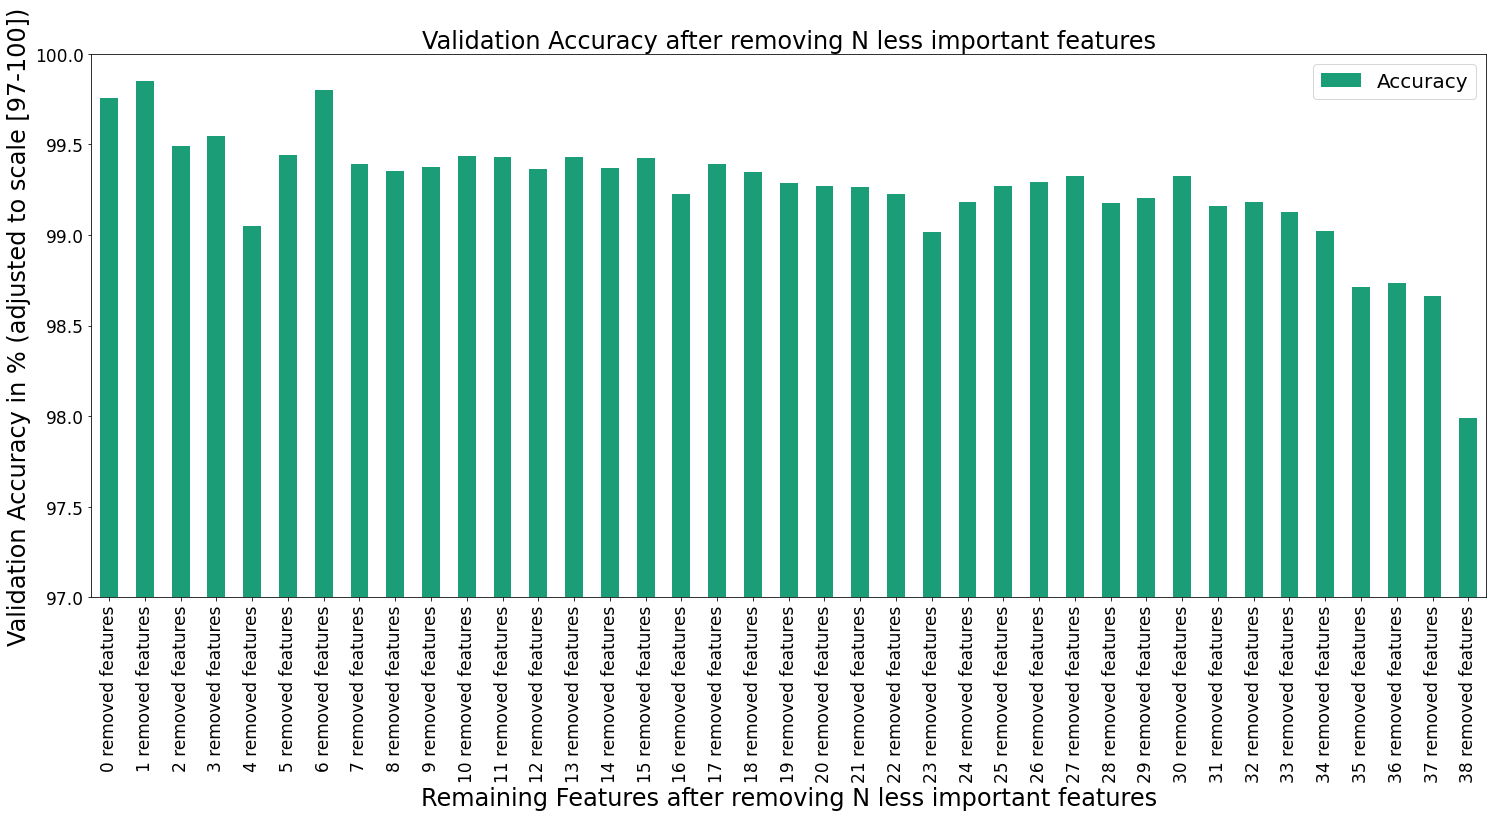

In [138]:
iterative_feature_removal_stats_df = pd.DataFrame.from_dict(iterative_feature_removal_stats, orient='index', columns=['Accuracy'])
iterative_feature_removal_stats_df['Accuracy'] = iterative_feature_removal_stats_df.apply(lambda row: row['Accuracy'] * 100, axis=1)
ax1 = iterative_feature_removal_stats_df.plot.bar(figsize=(25,10), ylabel='Accuracy', rot=90, fontsize=17, colormap='Dark2')
ax1.set_xlabel('Remaining Features after removing N less important features',fontdict={'fontsize':24})
ax1.set_ylabel('Validation Accuracy in % (adjusted to scale [97-100])',fontdict={'fontsize':24})
ax1.legend(fontsize=20)
ax1.set_ylim([97,100])
ax1.set_title("Validation Accuracy after removing N less important features", fontsize=24)

***Step-2 Inference:***

As seen in the above graph, the first dip in the model perfomance happened when 4 features are removed. However, we need to find the best possible set of features

The best possible set of features can be obtained from the above graph where we have to find the minimal set of features that resulted in the best valdiation accuracy.

From the above graph, the when 22 features low importance features are removed, we have seen the highest validation accuracy.
Therefore, we will build the model after removing 22 low importance features and compare it with the model with all features

***Step -3: Performance Comparision: All Features Model vs Important Features Model***

In [140]:
final_features_selected = sorted_single_column_accuracy_stats_df[23:]['feature_name'].tolist()
imp_features_cat = []
for cat_col in catg_cols:
    if cat_col in final_features_selected:
        imp_features_cat.append(cat_col)
    
imp_features_cont = []
for cont_col in cont_cols:
    if cont_col in final_features_selected:
        imp_features_cont.append(cont_col)
    
imp_features = imp_features_cat + imp_features_cont + ['label']
imp_feat_model_object, imp_feat_model_selected_history = get_model_accuracy_with_one_or_more_multiple_inputs(df[imp_features],
                                                                                imp_features, imp_features_cont)
imp_feat_model_selected_history.history['val_accuracy'][-1]

C:\Users\Saiga\AppData\Local\Temp/ipykernel_12548/1314545211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dummy_value_name] = dummy_values[category]


(494020, 86)
(494020, 85) (494020,)
98804


0.9925610423088074

In [141]:
all_features = catg_cols + cont_cols + ["label"]
all_feat_model_object, all_feat_model_selected_history = get_model_accuracy_with_one_or_more_multiple_inputs(df[all_features],
                                                                                all_features, cont_cols)
all_feat_model_selected_history.history['val_accuracy'][-1]

C:\Users\Saiga\AppData\Local\Temp/ipykernel_12548/1314545211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dummy_value_name] = dummy_values[category]


(494020, 120)
(494020, 119) (494020,)
98804


0.9964373707771301

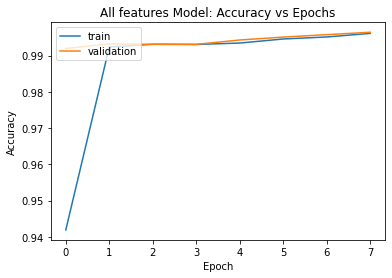

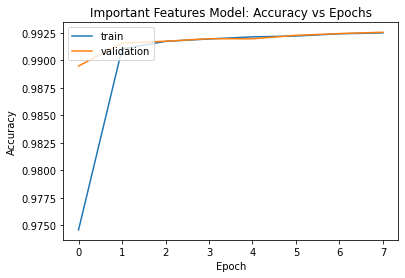

In [142]:
import matplotlib.pyplot as plt

plt.plot(all_feat_model_selected_history.history['accuracy'])
plt.plot(all_feat_model_selected_history.history['val_accuracy'])
plt.title('All features Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(imp_feat_model_selected_history.history['accuracy'])
plt.plot(imp_feat_model_selected_history.history['val_accuracy'])
plt.title('Important Features Model: Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Step - 3 Inference***

1.The learning rate of the all features model did not change after second epoch.

2.However, the importance feature model had a constan learning rate over the epochs which is promising.

3.Moreover, we have obtained better metric results (accuracy) with the importance features model.

4.Also, modeling time of the importance features model is faster than the all features model as the compuations are lesser with lesser number of features. Morever, it is a save in terms of computing cost and modeling time.

***Conclusion:***

In [145]:
final_features_selected

['dst_bytes',
 'same_srv_rate',
 'logged_in',
 'is_guest_login',
 'dst_host_diff_srv_rate',
 'root_shell',
 'num_file_creations',
 'src_bytes',
 'duration',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'srv_diff_host_rate',
 'dst_host_count',
 'service',
 'count']

The above list of features are derived as importance ones for this dataset using iterative feature reduction technique.